<a href="https://colab.research.google.com/github/AndrewLoweUoM/lake_district/blob/main/Glacier_Runoff_model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Glacier Runoff Model**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read temperature data from passu_glacier_data.asc
# Code to read temperature data

# Step 2: Read snowline elevations
# Code to read snowline elevations

# Step 3: Read ice area and total area for each elevation zone
passu_hypsometry_file = 'passu_hypsometry.csv'
passu_hypsometry_df = pd.read_csv(passu_hypsometry_file)

# Step 4: Calculate runoff in each elevation zone
# Code to calculate runoff using degree day factor for snow and ice

# Step 5: Calculate total runoff
total_runoff = runoff_zone1 + runoff_zone2 + runoff_zone3

# Step 6: Read actual flow data
# Code to read actual flow data

# Step 7: Plot time series of calculated runoff against actual runoff
# Code to plot time series

# Step 8: Evaluate the performance using evaluation metrics
# Code to calculate R-squared and Nash-Sutcliffe efficiency

# Plot results
# Code to plot total runoff against actual runoff


Simple Glacier Runoff Model

**Passu Glacier Pakistan - Data July 1997 - Glacier runoff model**

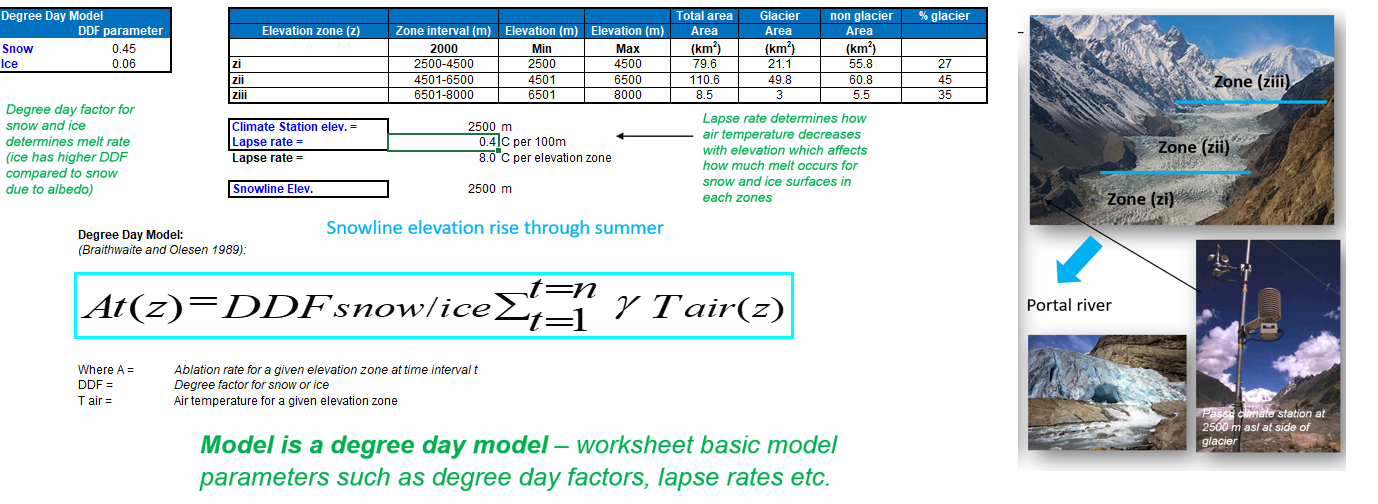

This Python code performs several tasks related to glacier runoff modeling and evaluation. The code integrates data processing, modeling, visualization, evaluation, and output generation for glacier runoff prediction.

This is a summary of the main sections and actions taken in the code:

**Import Libraries:** The code imports necessary libraries such as pandas, numpy, matplotlib, Google Colab, and scikit-learn.

**Load Data:** It loads climate and flow data from CSV files stored in Google Drive, creating pandas DataFrames for each dataset.

**Declare Variables:** Various variables related to the glacier runoff model are defined, including climate station elevation, temperature lapse rate, degree day factors, snowline elevation, elevation zones, areas, and intervals.

**Calculate Temperature in Elevation Zones:** Using the temperature lapse rate, the code calculates the temperature in each elevation zone.

**Calculate Degree Day Factor for Each Elevation Zone:** Based on the snowline elevation, the degree day factor is determined for each elevation zone, distinguishing between ice and snow-covered areas.

**Calculate Melt Rate:** The melt rate is calculated for each elevation zone based on temperature and degree day factor.

**Set Area of Each Elevation Zone:** The area of each elevation zone is set based on the snowline elevation, distinguishing between ice-covered and snow-covered areas.

**Calculate Runoff in Each Elevation Zone:** Runoff is calculated for each elevation zone, considering the melt rate and area.

**Apply Runoff Delay:** Runoff delay is applied due to glacier storage, with different delay times above and below the snowline.

**Calculate Total Runoff**: The total runoff in the glacier's portal river is calculated by summing the runoff from each elevation zone.

**Produce Time Series Plots**: Time series plots are created to visualize observed flow, predicted flow, and temperature.

**Evaluate Model Performance**: The model's performance is evaluated using various metrics such as R-squared, mean squared error (MSE), Nash-Sutcliffe Efficiency (NSE), and Percent Bias (PBIAS).

**Fit Linear Regression Model**: A linear regression model is fitted using scikit-learn and evaluated.

**Create Scatter Plot of Observed vs. Predicted Flow**: A scatter plot is created to visualize the relationship between observed and predicted flow.

**Write Model Results to CSV File**: The predicted flow values are written to a CSV file stored in Google Drive.

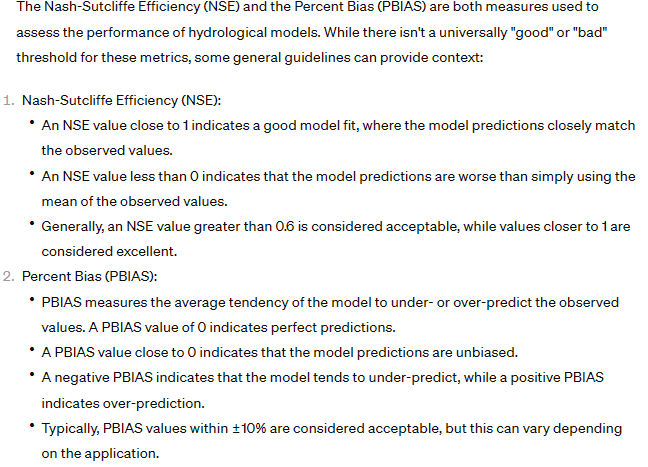

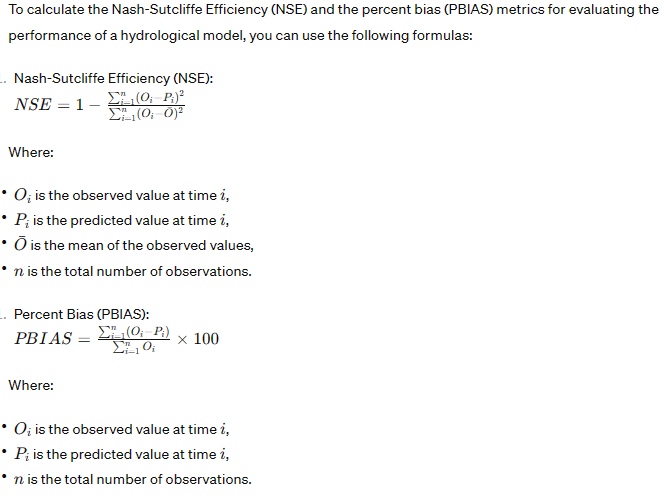

**Glacier Runoff Model - Final**

Andrew Lowe
ID 1223456
Mounted at /content/drive/
elevation_zone 1 is ice cover
0.45
elevation_zone 2 is ice cover
0.45
elevation_zone 3 is snow cover
0.06


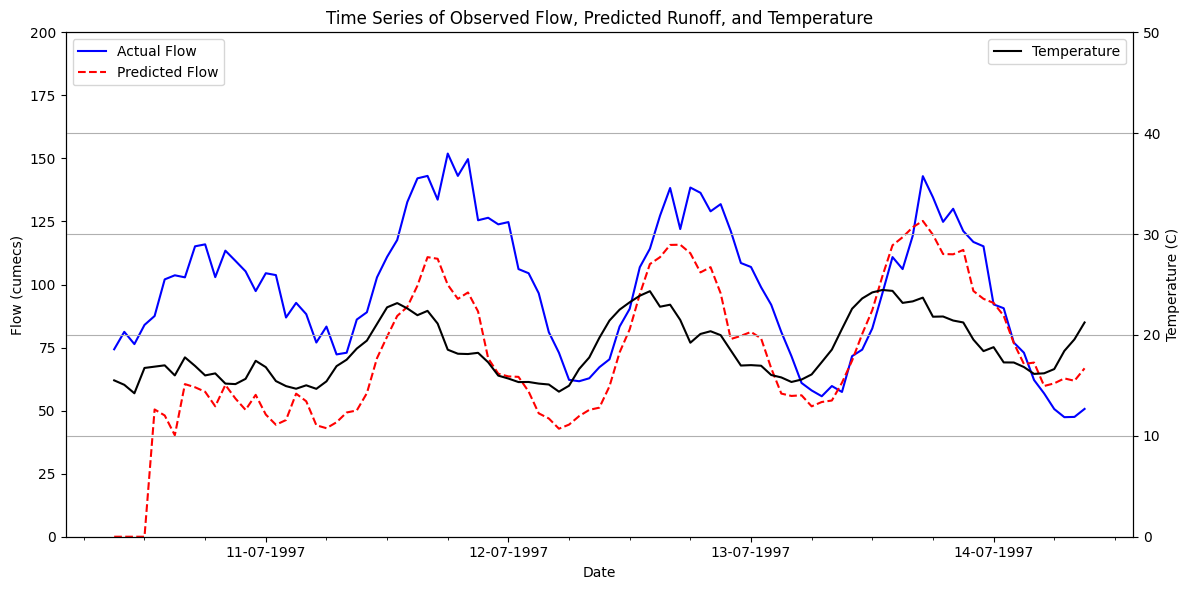

Evaluation Metrics for Total Predicted Flow:
R2: 0.19
MSE: 764.10
Nash-Sutcliffe Efficiency (NSE): -0.738820004842629
Percent Bias (PBIAS): 27.08072233027781
Coefficients (Scikit-learn): [0.66768059]
Intercept (Scikit-learn): 6.041505176533903
Mean Squared Error (Scikit-learn): 469.8775571345075
R-squared (Scikit-learn): 0.4068606417553655


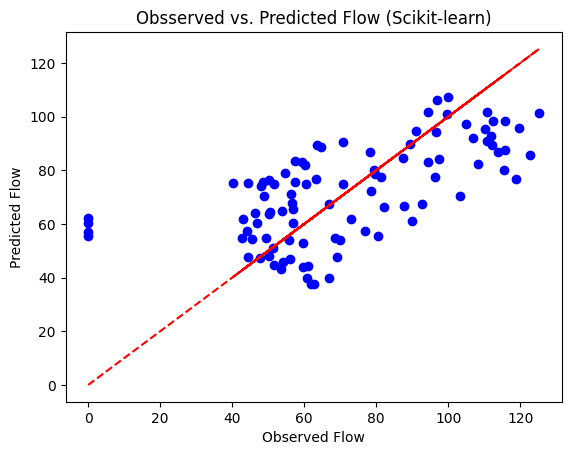

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     65.16
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.12e-12
Time:                        19:33:31   Log-Likelihood:                -436.03
No. Observations:                  97   AIC:                             876.1
Df Residuals:                      95   BIC:                             881.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.0415      8.422      0.717

In [57]:
# Glacier runoff model using a temperature index method or degree day approach
#change parameters temperature lapse rate, degree day factor for now and ice, and snowline elevation
# IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive.
import matplotlib.pyplot as plt # for plotting.
import matplotlib.dates as mdates # for plotting dates on graphs
from sklearn import linear_model # imports Linear Regression Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # module in the scikit-learn library to provide various metrics to evaulate models such as mean squared error (mse) and R-squared
import statsmodels.api as sm # imports the statsmodels library and aliases it as sm. The statsmodels is a Python library for estimating and interpreting various statistical models including fitting regression models, conducting statistical tests, and performing time series analysis.

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the climate data CSV file from Google Drive (files in folder 'Previous Input Files)
file_path = '/content/drive/MyDrive/dataset/passu_climate_data.csv'

# Read climate data from CSV file and create a DataFrame
climate_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%d/%m/%Y %H:%M')

# Load the flow data CSV file from Google Drive
file_path = '/content/drive/MyDrive/dataset/passu_flow_data.csv'

# Read observed flow data from CSV file and create a DataFrame
flow_df = pd.read_csv(file_path)


# DECLARE VARIABLES USED IN GLACIER RUNOFF MODEL

# Define the variables
climate_station_elevation = 2500 # masl
temperature_lapse_rate = 0.3 # C per 100m
degree_day_factor_ice = 0.45
degree_day_factor_snow = 0.06
snowline_elevation = 5600 # masl


# Define elevation zones
elev_min_zone_1, elev_midpt_zone_1, elev_max_zone_1 = 2500, 3500, 4500 # masl
elev_min_zone_2, elev_midpt_zone_2, elev_max_zone_2 = 4501, 5500, 6500 # masl
elev_min_zone_3, elev_midpt_zone_3, elev_max_zone_3 = 6501, 7500, 8000 # masl


# Define elevation zones ice area and total area convert from km2 to m2
ice_area_zone_1, total_area_zone_1 = 21.1 * 1000000, 79.6 * 1000000
ice_area_zone_2, total_area_zone_2 = 49.8 * 1000000, 110.6 * 1000000
ice_area_zone_3, total_area_zone_3 = 3.0 * 1000000, 8.5 * 1000000


# Define the number of 100 m intervals for each elevation zone to calculate the lapse rate using zone maximum elevation minus the climate station elevation
elev_intervals_zone_1 = 20
elev_intervals_zone_2 = 40
elev_intervals_zone_3 = 55

# CALCULATE TEMPERATURE IN THE ELEVATION ZONES USE TEMPERATURE LAPSE RATE

# Convert 'Date' column to datetime object
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%d/%m/%Y %H:%M')
flow_df['Date'] = pd.to_datetime(flow_df['Date'], format='%d/%m/%Y %H:%M')

# Read Temperature data from DataFrame
temperature = climate_df['Temperature']

# Print temperature data from DataFrame
#print (climate_df['Temperature'])

# Calculate the temperature in each zone using the lapse rate
temp_zone_1 = temperature - (temperature_lapse_rate * elev_intervals_zone_1)
temp_zone_2 = temperature - (temperature_lapse_rate * elev_intervals_zone_2)
temp_zone_3 = temperature - (temperature_lapse_rate * elev_intervals_zone_3)


# CALCULATE DEGREE DAY FACTOR FOR EACH ELEVATION ZONES BASED ON SNOWLINE ELEVATION

# Check if the snowline elevation is greater than the midpoint elevation of each zone and set degree_day_factor to snow above and ice below
degree_day_factor_zone_1 = degree_day_factor_ice if snowline_elevation > elev_midpt_zone_1 else degree_day_factor_snow
degree_day_factor_zone_2 = degree_day_factor_ice if snowline_elevation > elev_midpt_zone_2 else degree_day_factor_snow
degree_day_factor_zone_3 = degree_day_factor_ice if snowline_elevation > elev_midpt_zone_3 else degree_day_factor_snow

# Print degree_day_factor in each elevation zone check values
#print (degree_day_factor_zone_1)
#print (degree_day_factor_zone_2)
#print (degree_day_factor_zone_3)


# WRITE IF ELEVATION ZONE IS ICE OR SNOWCOVERED AND GIVE DEGREE DAY FACTOR VALUE

# Check if elevation zone 1 is ice or snow covered
if degree_day_factor_zone_1 == degree_day_factor_ice:
    print('elevation_zone 1 is ice cover')
    print (degree_day_factor_zone_1)
else:
    print('elevation_zone 1 is snow cover')
    print (degree_day_factor_zone_1)

# Check if elevation zone 2 is ice or snow covered
if degree_day_factor_zone_2 == degree_day_factor_ice:
    print('elevation_zone 2 is ice cover')
    print (degree_day_factor_zone_2)
else:
    print('elevation_zone 2 is snow cover')
    print (degree_day_factor_zone_2)

# Check if elevation zone 3 is ice or snow covered
if degree_day_factor_zone_3 == degree_day_factor_ice:
    print('elevation_zone 3 is ice cover')
    print (degree_day_factor_zone_3)
else:
    print('elevation_zone 3 is snow cover')
    print (degree_day_factor_zone_3)


# CALCULATE THE MELT RATE (mm/hr) FOR EACH ELEVATION ZONE

# Calculate melt in each elevation zone (mm/hr)
melt_zone_1 = temp_zone_1 * degree_day_factor_zone_1
melt_zone_2 = temp_zone_2 * degree_day_factor_zone_2
melt_zone_3 = temp_zone_3 * degree_day_factor_zone_3


# Set melt values to 0 if negative
melt_zone_1 = melt_zone_1.clip(lower=0)
melt_zone_2 = melt_zone_2.clip(lower=0)
melt_zone_3 = melt_zone_3.clip(lower=0)

# Print melt in each elevation zone in mm/hr to check values
#print (temp_zone_1)
#print (temp_zone_2)
#print (temp_zone_3)


# SET THE AREA (m2) OF EACH ELEVATION ZONE BASED ON SNOWLINE ELEVATION. IF THE ELEVATION ZONE IS BELOW THE SNOWLINE SET TO ICE AREA AND IF ABOVE SET IT TO TOTAL AREA

# Check if the snowline elevation is greater than the midpoint elevation of each zone and set total area above the snowline and ice area below the snowline
area_zone_1 = ice_area_zone_1 if snowline_elevation > elev_midpt_zone_1 else total_area_zone_1
area_zone_2 = ice_area_zone_2 if snowline_elevation > elev_midpt_zone_2 else total_area_zone_2
area_zone_3 = ice_area_zone_3 if snowline_elevation > elev_midpt_zone_3 else total_area_zone_3

# Print area of each elevation zone
#print (area_zone_1)
#print (area_zone_2)
#print (area_zone_3)

# CALCULATE RUNOFF IN EACH ELEVATION ZONE, ACCOUNT FOR RUNOFF TRAVEL TIME, AND SUM TOGETHER TO GIVE TOTAL RUNOFF IN GLACIER PORTAL RIVER

# Calculate runoff in each elevation zone
runoff_zone_1 = melt_zone_1 * area_zone_1
runoff_zone_2 = melt_zone_2 * area_zone_2
runoff_zone_3 = melt_zone_3 * area_zone_3

# Convert to cumecs (m3/s)
runoff_zone_1_cms = (runoff_zone_1 *1000 / 3600)/1e6
runoff_zone_2_cms = (runoff_zone_2 *1000 / 3600)/1e6
runoff_zone_3_cms = (runoff_zone_3 *1000 / 3600)/1e6

# Print the runoff in each elevation zone in cumecs (cms) or m3/s
#print (runoff_zone_1_cms)
#print (runoff_zone_2_cms)
#print (runoff_zone_3_cms)

# APPLY A RUNOFF DELAY DUE TO GLACIER STORAGE AFFECTING TRAVEL TIME

# Apply a delay in runoff due to glacier storage: 3-hour delay above the snowline and 1-hour delay below, except for zone 1 which has no delay.
runoff_z1 = runoff_zone_1_cms.shift(0)

if snowline_elevation > elev_min_zone_2:
    runoff_z2_delay = 4
else:
    runoff_z2_delay = 1
runoff_z2 = runoff_zone_2_cms.shift(runoff_z2_delay)

if snowline_elevation > elev_min_zone_3:
    runoff_z3_delay = 4
else:
    runoff_z3_delay = 1
runoff_z3 = runoff_zone_3_cms.shift(runoff_z3_delay)

# Print the runoff in each elevation zone in cms with time delay imposed
#print (runoff_z1)
#print (runoff_z2)
#print (runoff_z3)

#CALCULATE THE TOTAL RUNOFF IN THE GLACIER PORTAL STREAM

# Calculate total runoff by summing the runoff from each elevation zone in cms (m3/s)
total_runoff = runoff_z1 + runoff_z2 + runoff_z3

# fill rows with NaN values from total_runoff DataFrame
total_runoff = total_runoff.fillna(0)
total_runoff = total_runoff.interpolate(method='linear')

# Print the total runoff in glacier's portal river
#print (total_runoff)

# PRODUCE RESULT TIME SERIES GRAPHS

# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW

# Plot time series of observed flow and predicted flow
#plt.figure(figsize=(12, 6))
#plt.plot(climate_df['Date'], flow_df['Observed Flow'], label='Actual Flow', color='blue')
#plt.plot(climate_df['Date'], total_runoff, label='Total Predicted Flow', linestyle='--', color='red')
#plt.xlabel('Date')
#plt.ylabel('Flow (cumecs)')
#plt.title('Time Series of Observed Flow and Predicted Runoff')
#plt.legend()

#Set range for y-axis
#plt.ylim(0, 200)

# Set x-axis major and minor intervals
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
#plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor interval: 6 hours
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Plot GRID
#plt.grid(True)
#plt.tight_layout()
#plt.show()

# PRODUCE RESULT TIME SERIES GRAPH WITH OBSERVED AND PREDICTED FLOW ON PRIMARY AXIS AND TEMPERATURE ON SECONDARY AXIS

# Create figure and axis objects with increased plot size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot actual flow and total predicted flow on the primary axis (ax1)
ax1.plot(climate_df['Date'], flow_df['Observed Flow'], label='Actual Flow', color='blue')
ax1.plot(climate_df['Date'], total_runoff, label='Predicted Flow', linestyle='--', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Flow (cumecs)')

# Set the range of the primary y-axis
ax1.set_ylim(0, 200)

# Create a secondary axis for temperature
ax2 = ax1.twinx()
ax2.plot(climate_df['Date'], climate_df['Temperature'], label='Temperature', color='black')
ax2.set_ylabel('Temperature (C)')

# Set the range of the secondary y-axis
ax2.set_ylim(0, 50)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY

# Title and legend
plt.title('Time Series of Observed Flow, Predicted Runoff, and Temperature')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Add grid to plot
plt.grid(True)
plt.tight_layout()

plt.show()


# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
#r2_total = r2_score(flow_df['Observed Flow'], total_runoff)
#mse_total = mean_squared_error(flow_df['Observed Flow'], total_runoff)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2_total:.2f}")
print(f"MSE: {mse_total:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_df['Observed Flow']
predicted_values = total_runoff

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)

# Evaluate runoff model results (3) by fitting a linear regression model using Scikit-learn

# Prepare the data
obs_flow_X = flow_df[['Observed Flow']]  # Predictor variable ()
pred_flow_y = total_runoff    # Target variable ()

# Create and fit a linear regression model using Scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(obs_flow_X, pred_flow_y)

# Print coefficients and intercept from Scikit-learn model
print("Coefficients (Scikit-learn):", model_sklearn.coef_)
print("Intercept (Scikit-learn):", model_sklearn.intercept_)

# Predict using the Scikit-learn model
pred_flow_y_pred_sklearn = model_sklearn.predict(obs_flow_X)

# Calculate mean squared error and R-squared for Scikit-learn model
mse_sklearn = mean_squared_error(pred_flow_y,pred_flow_y_pred_sklearn)
r2_sklearn = r2_score(pred_flow_y, pred_flow_y_pred_sklearn)
print("Mean Squared Error (Scikit-learn):", mse_sklearn)
print("R-squared (Scikit-learn):", r2_sklearn)

# CREATE SCATTER PLOT OF OBSERVED FLOW and PREDICTED FLOW

# Scatter plot of actual vs. predicted values and fitting a linear regression model using Scikit-learn
plt.scatter(pred_flow_y, pred_flow_y_pred_sklearn, color='blue')
plt.plot(pred_flow_y, pred_flow_y, color='red', linestyle='--')
plt.xlabel('Observed Flow')
plt.ylabel('Predicted Flow')
plt.title('Obsserved vs. Predicted Flow (Scikit-learn)')
plt.show()


# Evaluate runoff model results (3) using sklearn statistical model (sm) model and regression model and create a table of statistics

# Add a constant term to the predictor variable matrix. common to include a constant term (also known as an intercept) in the model. This constant term represents the value of the dependent variable when all independent variables are zero.
obs_flow_X_pred_flow = sm.add_constant(flow_df['Observed Flow'])

# Create and fit the OLS (Ordinary Least Squares) regression model for observed flow and predicted flow
model = sm.OLS(total_runoff, obs_flow_X_pred_flow)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

results_df = pd.DataFrame({'Date': climate_df['Date'], 'Observed Flow': flow_df['Observed Flow'], 'Predicted Flow': total_runoff})
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_predicted_flow.csv', index=False)
print("File saved successfully!")


**Glacier Runoff Model - a linear regression model (Final) - 11 to 20 July using CSV passu_climate_1997.csv and passu_flow_1997.csv**

Andrew Lowe
ID 1223456
Mounted at /content/drive/
elevation_zone 1 is ice cover
0.45
elevation_zone 2 is ice cover
0.45
elevation_zone 3 is snow cover
0.08


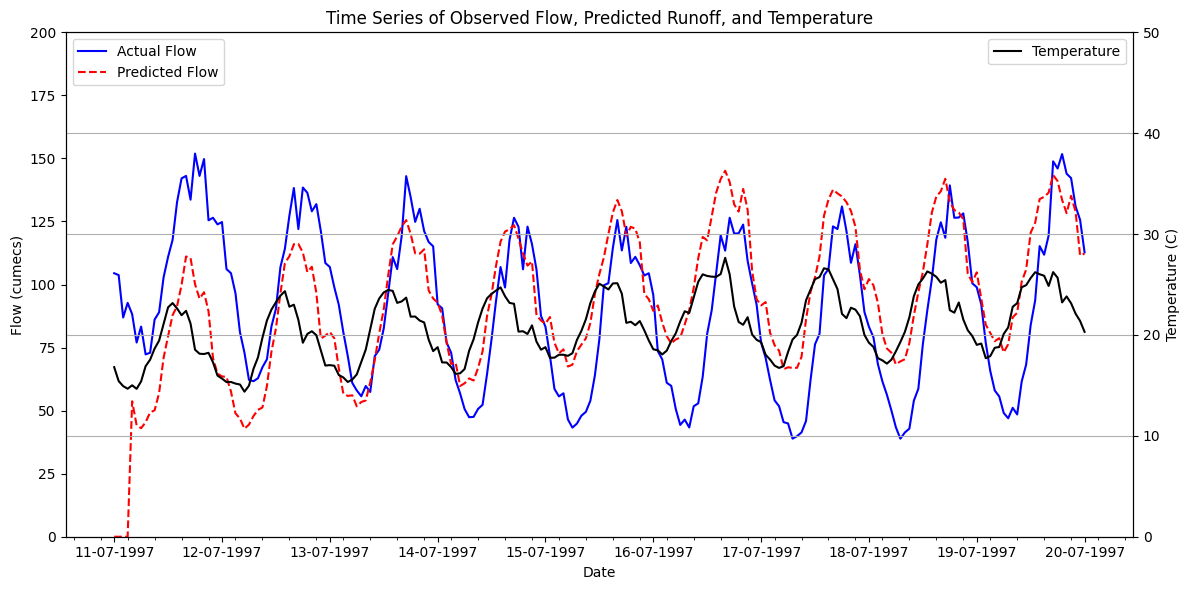

Evaluation Metrics for Total Predicted Flow:
R2: 0.19
MSE: 764.14
Nash-Sutcliffe Efficiency (NSE): 0.19234589746386488
Percent Bias (PBIAS): -2.1560829470958507
Coefficients (Scikit-learn): [0.55135886]
Intercept (Scikit-learn): 42.89230006353077
Mean Squared Error (Scikit-learn): 569.8363914871036
R-squared (Scikit-learn): 0.3354322176874752


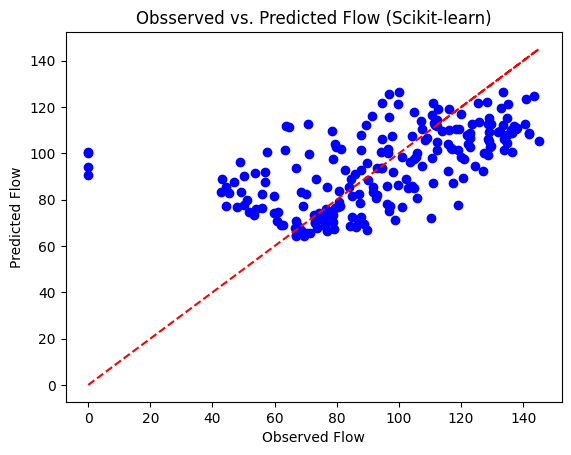

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           7.79e-21
Time:                        22:16:07   Log-Likelihood:                -996.38
No. Observations:                 217   AIC:                             1997.
Df Residuals:                     215   BIC:                             2004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.8923      5.095      8.418

In [5]:
# Glacier runoff model using a temperature index method or degree day approach
#change parameters temperature lapse rate, degree day factor for now and ice, and snowline elevation
# IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
import matplotlib.dates as mdates # for plotting dates on graphs
#from sklearn import linear_model # imports Linear Regression Scikit-learn
#from sklearn.metrics import mean_squared_error, r2_score # module in the scikit-learn library to provide various metrics to evaulate models such as mean squared error (mse) and R-squared
import statsmodels.api as sm # imports the statsmodels library and aliases it as sm. The statsmodels is a Python library for estimating and interpreting various statistical models including fitting regression models, conducting statistical tests, and performing time series analysis.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the climate data CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/passu_climate_data_1997.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'

# Read climate data from CSV file and create a DataFrame
climate_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%d/%m/%Y %H:%M')

# Load the flow data CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/passu_flow_data_1997.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'

# Read observed flow data from CSV file and create a DataFrame
flow_df = pd.read_csv(file_path)


# DECLARE VARIABLES USED IN GLACIER RUNOFF MODEL

# Define the variables
climate_station_elevation = 2500 # masl
temperature_lapse_rate = 0.3 # C per 100m
degree_day_factor_ice = 0.45
degree_day_factor_snow = 0.08
snowline_elevation = 5600 # masl


# Define elevation zones
elev_min_zone_1, elev_midpt_zone_1, elev_max_zone_1 = 2500, 3500, 4500 # masl
elev_min_zone_2, elev_midpt_zone_2, elev_max_zone_2 = 4501, 5500, 6500 # masl
elev_min_zone_3, elev_midpt_zone_3, elev_max_zone_3 = 6501, 7500, 8000 # masl


# Define elevation zones ice area and total area convert from km2 to m2
ice_area_zone_1, total_area_zone_1 = 21.1 * 1000000, 79.6 * 1000000
ice_area_zone_2, total_area_zone_2 = 49.8 * 1000000, 110.6 * 1000000
ice_area_zone_3, total_area_zone_3 = 3.0 * 1000000, 8.5 * 1000000


# Define the number of 100 m intervals for each elevation zone to calculate the lapse rate using zone maximum elevation minus the climate station elevation
elev_intervals_zone_1 = 20
elev_intervals_zone_2 = 40
elev_intervals_zone_3 = 55

# CALCULATE TEMPERATURE IN THE ELEVATION ZONES USE TEMPERATURE LAPSE RATE

# Convert 'Date' column to datetime object
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%d/%m/%Y %H:%M')
flow_df['Date'] = pd.to_datetime(flow_df['Date'], format='%d/%m/%Y %H:%M')

# Read Temperature data from DataFrame
temperature = climate_df['Temperature']

# Print temperature data from DataFrame
#print (climate_df['Temperature'])

# Calculate the temperature in each zone using the lapse rate
temp_zone_1 = temperature - (temperature_lapse_rate * elev_intervals_zone_1)
temp_zone_2 = temperature - (temperature_lapse_rate * elev_intervals_zone_2)
temp_zone_3 = temperature - (temperature_lapse_rate * elev_intervals_zone_3)


# CALCULATE DEGREE DAY FACTOR FOR EACH ELEVATION ZONES BASED ON SNOWLINE ELEVATION

# Check if the snowline elevation is greater than the midpoint elevation of each zone and set degree_day_factor to snow above and ice below
degree_day_factor_zone_1 = degree_day_factor_ice if snowline_elevation > elev_midpt_zone_1 else degree_day_factor_snow
degree_day_factor_zone_2 = degree_day_factor_ice if snowline_elevation > elev_midpt_zone_2 else degree_day_factor_snow
degree_day_factor_zone_3 = degree_day_factor_ice if snowline_elevation > elev_midpt_zone_3 else degree_day_factor_snow

# Print degree_day_factor in each elevation zone check values
#print (degree_day_factor_zone_1)
#print (degree_day_factor_zone_2)
#print (degree_day_factor_zone_3)


# WRITE IF ELEVATION ZONE IS ICE OR SNOWCOVERED AND GIVE DEGREE DAY FACTOR VALUE

# Check if elevation zone 1 is ice or snow covered
if degree_day_factor_zone_1 == degree_day_factor_ice:
    print('elevation_zone 1 is ice cover')
    print (degree_day_factor_zone_1)
else:
    print('elevation_zone 1 is snow cover')
    print (degree_day_factor_zone_1)

# Check if elevation zone 2 is ice or snow covered
if degree_day_factor_zone_2 == degree_day_factor_ice:
    print('elevation_zone 2 is ice cover')
    print (degree_day_factor_zone_2)
else:
    print('elevation_zone 2 is snow cover')
    print (degree_day_factor_zone_2)

# Check if elevation zone 3 is ice or snow covered
if degree_day_factor_zone_3 == degree_day_factor_ice:
    print('elevation_zone 3 is ice cover')
    print (degree_day_factor_zone_3)
else:
    print('elevation_zone 3 is snow cover')
    print (degree_day_factor_zone_3)


# CALCULATE THE MELT RATE (mm/hr) FOR EACH ELEVATION ZONE

# Calculate melt in each elevation zone (mm/hr)
melt_zone_1 = temp_zone_1 * degree_day_factor_zone_1
melt_zone_2 = temp_zone_2 * degree_day_factor_zone_2
melt_zone_3 = temp_zone_3 * degree_day_factor_zone_3


# Set melt values to 0 if negative
melt_zone_1 = melt_zone_1.clip(lower=0)
melt_zone_2 = melt_zone_2.clip(lower=0)
melt_zone_3 = melt_zone_3.clip(lower=0)

# Print melt in each elevation zone in mm/hr to check values
#print (temp_zone_1)
#print (temp_zone_2)
#print (temp_zone_3)


# SET THE AREA (m2) OF EACH ELEVATION ZONE BASED ON SNOWLINE ELEVATION. IF THE ELEVATION ZONE IS BELOW THE SNOWLINE SET TO ICE AREA AND IF ABOVE SET IT TO TOTAL AREA

# Check if the snowline elevation is greater than the midpoint elevation of each zone and set total area above the snowline and ice area below the snowline
area_zone_1 = ice_area_zone_1 if snowline_elevation > elev_midpt_zone_1 else total_area_zone_1
area_zone_2 = ice_area_zone_2 if snowline_elevation > elev_midpt_zone_2 else total_area_zone_2
area_zone_3 = ice_area_zone_3 if snowline_elevation > elev_midpt_zone_3 else total_area_zone_3

# Print area of each elevation zone
#print (area_zone_1)
#print (area_zone_2)
#print (area_zone_3)

# CALCULATE RUNOFF IN EACH ELEVATION ZONE, ACCOUNT FOR RUNOFF TRAVEL TIME, AND SUM TOGETHER TO GIVE TOTAL RUNOFF IN GLACIER PORTAL RIVER

# Calculate runoff in each elevation zone
runoff_zone_1 = melt_zone_1 * area_zone_1
runoff_zone_2 = melt_zone_2 * area_zone_2
runoff_zone_3 = melt_zone_3 * area_zone_3

# Convert to cumecs (m3/s)
runoff_zone_1_cms = (runoff_zone_1 *1000 / 3600)/1e6
runoff_zone_2_cms = (runoff_zone_2 *1000 / 3600)/1e6
runoff_zone_3_cms = (runoff_zone_3 *1000 / 3600)/1e6

# Print the runoff in each elevation zone in cumecs (cms) or m3/s
#print (runoff_zone_1_cms)
#print (runoff_zone_2_cms)
#print (runoff_zone_3_cms)

# APPLY A RUNOFF DELAY DUE TO GLACIER STORAGE AFFECTING TRAVEL TIME

# Apply a delay in runoff due to glacier storage: 3-hour delay above the snowline and 1-hour delay below, except for zone 1 which has no delay.
runoff_z1 = runoff_zone_1_cms.shift(0)

if snowline_elevation > elev_min_zone_2:
    runoff_z2_delay = 4
else:
    runoff_z2_delay = 1
runoff_z2 = runoff_zone_2_cms.shift(runoff_z2_delay)

if snowline_elevation > elev_min_zone_3:
    runoff_z3_delay = 4
else:
    runoff_z3_delay = 1
runoff_z3 = runoff_zone_3_cms.shift(runoff_z3_delay)

# Print the runoff in each elevation zone in cms with time delay imposed
#print (runoff_z1)
#print (runoff_z2)
#print (runoff_z3)


#CALCULATE THE TOTAL RUNOFF IN THE GLACIER PORTAL STREAM

# Calculate total runoff by summing the runoff from each elevation zone in cms (m3/s)
total_runoff = runoff_z1 + runoff_z2 + runoff_z3

# fill rows with NaN values from total_runoff DataFrame
total_runoff = total_runoff.fillna(0)
total_runoff_interpolated = total_runoff.interpolate(method='linear')

# Print the total runoff in glacier's portal river
#print (total_runoff)

# PRODUCE RESULT TIME SERIES GRAPHS

# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW

# Plot time series of observed flow and predicted flow
#plt.figure(figsize=(12, 6))
#plt.plot(climate_df['Date'], flow_df['Observed Flow'], label='Actual Flow', color='blue')
#plt.plot(climate_df['Date'], total_runoff, label='Total Predicted Flow', linestyle='--', color='red')
#plt.xlabel('Date')
#plt.ylabel('Flow (cumecs)')
#plt.title('Time Series of Observed Flow and Predicted Runoff')
#plt.legend()

#Set range for y-axis
#plt.ylim(0, 200)

# Set x-axis major and minor intervals
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
#plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor interval: 6 hours
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Plot GRID
#plt.grid(True)
#plt.tight_layout()
#plt.show()

# PRODUCE RESULT TIME SERIES GRAPH WITH OBSERVED AND PREDICTED FLOW ON PRIMARY AXIS AND TEMPERATURE ON SECONDARY AXIS

# Create figure and axis objects with increased plot size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot actual flow and total predicted flow on the primary axis (ax1)
ax1.plot(climate_df['Date'], flow_df['Observed Flow'], label='Actual Flow', color='blue')
ax1.plot(climate_df['Date'], total_runoff, label='Predicted Flow', linestyle='--', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Flow (cumecs)')

# Set the range of the primary y-axis
ax1.set_ylim(0, 200)

# Create a secondary axis for temperature
ax2 = ax1.twinx()
ax2.plot(climate_df['Date'], climate_df['Temperature'], label='Temperature', color='black')
ax2.set_ylabel('Temperature (C)')

# Set the range of the secondary y-axis
ax2.set_ylim(0, 50)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY

# Title and legend
plt.title('Time Series of Observed Flow, Predicted Runoff, and Temperature')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Add grid to plot
plt.grid(True)
plt.tight_layout()

plt.show()


# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
r2_total = r2_score(flow_df['Observed Flow'], total_runoff)
mse_total = mean_squared_error(flow_df['Observed Flow'], total_runoff)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2_total:.2f}")
print(f"MSE: {mse_total:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_df['Observed Flow']
predicted_values = total_runoff

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)

# Evaluate runoff model results (3) by fitting a linear regression model using Scikit-learn

# Prepare the data
obs_flow_X = flow_df[['Observed Flow']]  # Predictor variable ()
pred_flow_y = total_runoff    # Target variable ()

# Create and fit a linear regression model using Scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(obs_flow_X, pred_flow_y)

# Print coefficients and intercept from Scikit-learn model
print("Coefficients (Scikit-learn):", model_sklearn.coef_)
print("Intercept (Scikit-learn):", model_sklearn.intercept_)

# Predict using the Scikit-learn model
pred_flow_y_pred_sklearn = model_sklearn.predict(obs_flow_X)

# Calculate mean squared error and R-squared for Scikit-learn model
mse_sklearn = mean_squared_error(pred_flow_y,pred_flow_y_pred_sklearn)
r2_sklearn = r2_score(pred_flow_y, pred_flow_y_pred_sklearn)
print("Mean Squared Error (Scikit-learn):", mse_sklearn)
print("R-squared (Scikit-learn):", r2_sklearn)

# CREATE SCATTER PLOT OF OBSERVED FLOW and PREDICTED FLOW

# Scatter plot of actual vs. predicted values and fitting a linear regression model using Scikit-learn
plt.scatter(pred_flow_y, pred_flow_y_pred_sklearn, color='blue')
plt.plot(pred_flow_y, pred_flow_y, color='red', linestyle='--')
plt.xlabel('Observed Flow')
plt.ylabel('Predicted Flow')
plt.title('Obsserved vs. Predicted Flow (Scikit-learn)')
plt.show()


# Evaluate runoff model results (3) using sklearn statistical model (sm) model and regression model and create a table of statistics

# Add a constant term to the predictor variable matrix. common to include a constant term (also known as an intercept) in the model. This constant term represents the value of the dependent variable when all independent variables are zero.
obs_flow_X_pred_flow = sm.add_constant(flow_df['Observed Flow'])

# Create and fit the OLS (Ordinary Least Squares) regression model for observed flow and predicted flow
model = sm.OLS(total_runoff, obs_flow_X_pred_flow)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

results_df = pd.DataFrame({'Date': climate_df['Date'], 'Observed Flow': flow_df['Observed Flow'], 'Predicted Flow': total_runoff})
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_predicted_flow.csv', index=False)
print("File saved successfully!")

**Glacier Runoff Model (Final) - 11 to 20 July using CSV passu_data_1997.csv**

Adding time series of snowline elevation

Andrew Lowe
ID 1223456
Mounted at /content/drive/


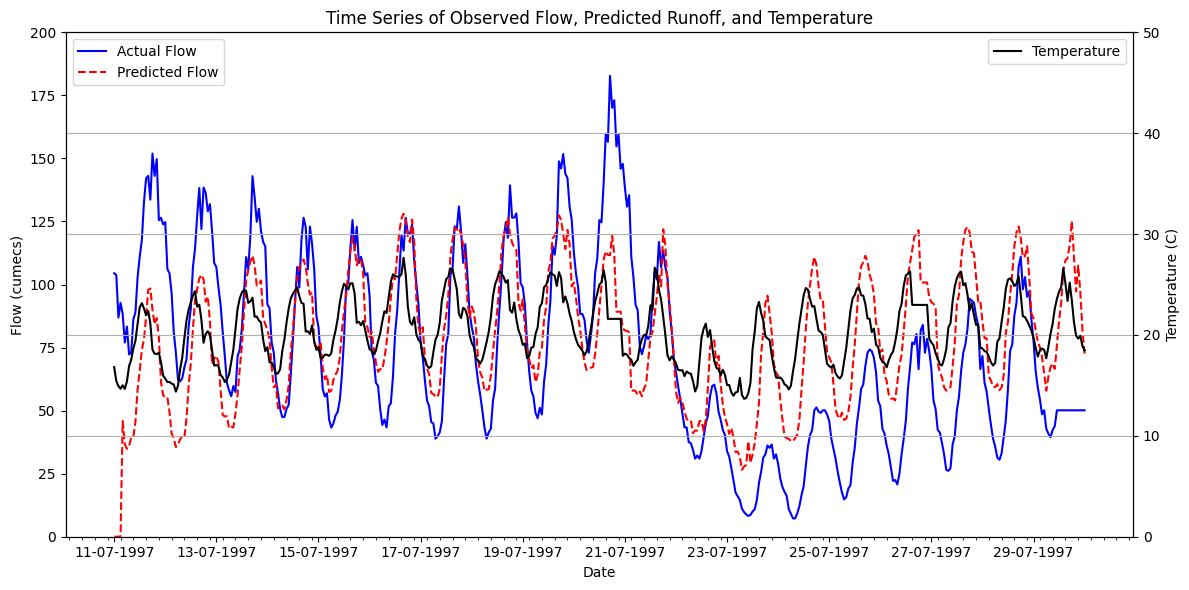

Evaluation Metrics for Total Predicted Flow:
R2: 0.31
MSE: 939.76
Nash-Sutcliffe Efficiency (NSE): 0.3143578858595063
Percent Bias (PBIAS): -6.4392218596838395
Coefficients (Scikit-learn): [0.41510141]
Intercept (Scikit-learn): 48.166942115036235
Mean Squared Error (Scikit-learn): 448.04323158395596
R-squared (Scikit-learn): 0.34517283186866476


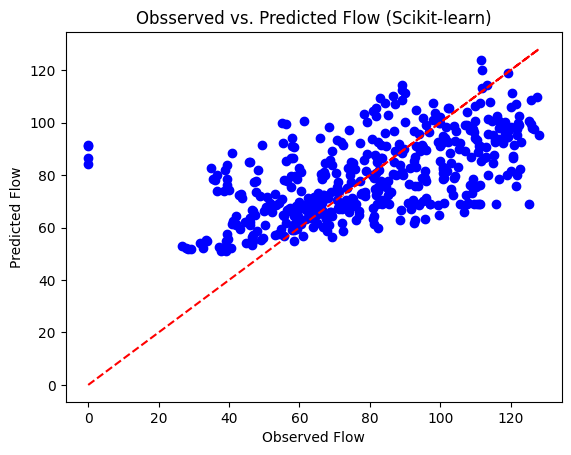

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           9.35e-44
Time:                        22:19:25   Log-Likelihood:                -2043.4
No. Observations:                 457   AIC:                             4091.
Df Residuals:                     455   BIC:                             4099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.1669      2.222     21.675

In [9]:
# Glacier runoff model using a temperature index method or degree day approach
# Change parameters temperature lapse rate, degree day factor for now and ice, and snowline elevation

# IMPORT LIBARIES
import pandas as pd  # pandas for data manipulation
import numpy as np  # numpy for numerical operations
from google.colab import drive  # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt  # for plotting a graph.
import matplotlib.dates as mdates  # for plotting dates on graphs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# NAME AND STUDENT ID
print('Andrew Lowe')
print('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the climate data CSV file from Google Drive
file_path = '/content/drive/MyDrive/dataset/passu_data_1997_full.csv'

# Read climate data from CSV file and create a DataFrame
climate_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%d/%m/%Y %H:%M')

# DECLARE VARIABLES USED IN GLACIER RUNOFF MODEL

# Define the variables
climate_station_elevation = 2500  # masl
temperature_lapse_rate = 0.3  # C per 100m
degree_day_factor_ice = 0.45
degree_day_factor_snow = 0.08

# Define elevation zones
elev_min_zone_1, elev_midpt_zone_1, elev_max_zone_1 = 2500, 3500, 4500  # masl
elev_min_zone_2, elev_midpt_zone_2, elev_max_zone_2 = 4501, 5500, 6500  # masl
elev_min_zone_3, elev_midpt_zone_3, elev_max_zone_3 = 6501, 7500, 8000  # masl

# Define elevation zones ice area and total area convert from km2 to m2
ice_area_zone_1, total_area_zone_1 = 21.1 * 1000000, 79.6 * 1000000
ice_area_zone_2, total_area_zone_2 = 49.8 * 1000000, 110.6 * 1000000
ice_area_zone_3, total_area_zone_3 = 3.0 * 1000000, 8.5 * 1000000

# Define the number of 100 m intervals for each elevation zone to calculate the lapse rate
elev_intervals_zone_1 = 20
elev_intervals_zone_2 = 40
elev_intervals_zone_3 = 55

# CALCULATE TEMPERATURE IN THE ELEVATION ZONES USING TEMPERATURE LAPSE RATE

# Read Temperature and Snowline Elevation data from DataFrame
temperature = climate_df['Temperature']
snowline_elevation = climate_df['Snowline Elevation']

# Calculate the temperature in each zone using the lapse rate
temp_zone_1 = temperature - (temperature_lapse_rate * elev_intervals_zone_1)
temp_zone_2 = temperature - (temperature_lapse_rate * elev_intervals_zone_2)
temp_zone_3 = temperature - (temperature_lapse_rate * elev_intervals_zone_3)

# CALCULATE DEGREE DAY FACTOR FOR EACH ELEVATION ZONE BASED ON SNOWLINE ELEVATION

# Check if the snowline elevation is greater than the midpoint elevation of each zone and set degree_day_factor
degree_day_factor_zone_1 = np.where(snowline_elevation > elev_midpt_zone_1, degree_day_factor_snow, degree_day_factor_ice)
degree_day_factor_zone_2 = np.where(snowline_elevation > elev_midpt_zone_2, degree_day_factor_snow, degree_day_factor_ice)
degree_day_factor_zone_3 = np.where(snowline_elevation > elev_midpt_zone_3, degree_day_factor_snow, degree_day_factor_ice)

# CALCULATE THE MELT RATE (mm/hr) FOR EACH ELEVATION ZONE

# Calculate melt in each elevation zone (mm/hr)
melt_zone_1 = temp_zone_1 * degree_day_factor_zone_1
melt_zone_2 = temp_zone_2 * degree_day_factor_zone_2
melt_zone_3 = temp_zone_3 * degree_day_factor_zone_3

# Set melt values to 0 if negative
melt_zone_1 = np.maximum(melt_zone_1, 0)
melt_zone_2 = np.maximum(melt_zone_2, 0)
melt_zone_3 = np.maximum(melt_zone_3, 0)

# SET THE AREA (m2) OF EACH ELEVATION ZONE BASED ON SNOWLINE ELEVATION

# Set total area above the snowline and ice area below the snowline for each elevation zone
area_zone_1 = np.where(snowline_elevation > elev_midpt_zone_1, total_area_zone_1, ice_area_zone_1)
area_zone_2 = np.where(snowline_elevation > elev_midpt_zone_2, total_area_zone_2, ice_area_zone_2)
area_zone_3 = np.where(snowline_elevation > elev_midpt_zone_3, total_area_zone_3, ice_area_zone_3)

# CALCULATE RUNOFF IN EACH ELEVATION ZONE, ACCOUNT FOR RUNOFF TRAVEL TIME, AND SUM TOGETHER TO GIVE TOTAL RUNOFF IN GLACIER PORTAL RIVER

# Calculate runoff in each elevation zone
runoff_zone_1 = melt_zone_1 * area_zone_1
runoff_zone_2 = melt_zone_2 * area_zone_2
runoff_zone_3 = melt_zone_3 * area_zone_3

# Convert to cumecs (m3/s)
runoff_zone_1_cms = (runoff_zone_1 * 1000 / 3600) / 1e6
runoff_zone_2_cms = (runoff_zone_2 * 1000 / 3600) / 1e6
runoff_zone_3_cms = (runoff_zone_3 * 1000 / 3600) / 1e6

# Apply a delay in runoff due to glacier storage
runoff_z1 = runoff_zone_1_cms.shift(0)
runoff_z2_delay = np.where(snowline_elevation > elev_min_zone_2, 4, 1)
#runoff_z2 = runoff_zone_2_cms.shift(runoff_z2_delay)
runoff_z2 = np.where(runoff_z2_delay == 4, runoff_zone_2_cms.shift(4), runoff_zone_2_cms.shift(1))
runoff_z3_delay = np.where(snowline_elevation > elev_min_zone_3, 4, 1)
#runoff_z3 = runoff_zone_3_cms.shift(runoff_z3_delay)
runoff_z3 = np.where(runoff_z3_delay == 4, runoff_zone_3_cms.shift(4), runoff_zone_3_cms.shift(1))

#CALCULATE THE TOTAL RUNOFF IN THE GLACIER PORTAL STREAM

# Calculate total runoff by summing the runoff from each elevation zone in cms (m3/s)
total_runoff = runoff_z1 + runoff_z2 + runoff_z3

# fill rows with NaN values from total_runoff DataFrame
total_runoff = total_runoff.fillna(0)
total_runoff_interpolated = total_runoff.interpolate(method='linear')

# Print the total runoff in glacier's portal river
#print (total_runoff)

# PRODUCE RESULT TIME SERIES GRAPHS

# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW

# Plot time series of observed flow and predicted flow
#plt.figure(figsize=(12, 6))
#plt.plot(climate_df['Date'], flow_df['Observed Flow'], label='Actual Flow', color='blue')
#plt.plot(climate_df['Date'], total_runoff, label='Total Predicted Flow', linestyle='--', color='red')
#plt.xlabel('Date')
#plt.ylabel('Flow (cumecs)')
#plt.title('Time Series of Observed Flow and Predicted Runoff')
#plt.legend()

#Set range for y-axis
#plt.ylim(0, 200)

# Set x-axis major and minor intervals
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
#plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor interval: 6 hours
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Plot GRID
#plt.grid(True)
#plt.tight_layout()
#plt.show()

# PRODUCE RESULT TIME SERIES GRAPH WITH OBSERVED AND PREDICTED FLOW ON PRIMARY AXIS AND TEMPERATURE ON SECONDARY AXIS

# Create figure and axis objects with increased plot size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot actual flow and total predicted flow on the primary axis (ax1)
ax1.plot(climate_df['Date'], climate_df['Observed Flow'], label='Actual Flow', color='blue')
ax1.plot(climate_df['Date'], total_runoff, label='Predicted Flow', linestyle='--', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Flow (cumecs)')

# Set the range of the primary y-axis
ax1.set_ylim(0, 200)

# Create a secondary axis for temperature
ax2 = ax1.twinx()
ax2.plot(climate_df['Date'], climate_df['Temperature'], label='Temperature', color='black')
ax2.set_ylabel('Temperature (C)')

# Set the range of the secondary y-axis
ax2.set_ylim(0, 50)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY

# Title and legend
plt.title('Time Series of Observed Flow, Predicted Runoff, and Temperature')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Add grid to plot
plt.grid(True)
plt.tight_layout()

plt.show()


# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
r2_total = r2_score(climate_df['Observed Flow'], total_runoff)
mse_total = mean_squared_error(climate_df['Observed Flow'], total_runoff)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2_total:.2f}")
print(f"MSE: {mse_total:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = climate_df['Observed Flow']
predicted_values = total_runoff

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)

# Evaluate runoff model results (3) by fitting a linear regression model using Scikit-learn

# Prepare the data
obs_flow_X = climate_df[['Observed Flow']]  # Predictor variable ()
pred_flow_y = total_runoff    # Target variable ()

# Create and fit a linear regression model using Scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(obs_flow_X, pred_flow_y)

# Print coefficients and intercept from Scikit-learn model
print("Coefficients (Scikit-learn):", model_sklearn.coef_)
print("Intercept (Scikit-learn):", model_sklearn.intercept_)

# Predict using the Scikit-learn model
pred_flow_y_pred_sklearn = model_sklearn.predict(obs_flow_X)

# Calculate mean squared error and R-squared for Scikit-learn model
mse_sklearn = mean_squared_error(pred_flow_y,pred_flow_y_pred_sklearn)
r2_sklearn = r2_score(pred_flow_y, pred_flow_y_pred_sklearn)
print("Mean Squared Error (Scikit-learn):", mse_sklearn)
print("R-squared (Scikit-learn):", r2_sklearn)

# CREATE SCATTER PLOT OF OBSERVED FLOW and PREDICTED FLOW

# Scatter plot of actual vs. predicted values and fitting a linear regression model using Scikit-learn
plt.scatter(pred_flow_y, pred_flow_y_pred_sklearn, color='blue')
plt.plot(pred_flow_y, pred_flow_y, color='red', linestyle='--')
plt.xlabel('Observed Flow')
plt.ylabel('Predicted Flow')
plt.title('Obsserved vs. Predicted Flow (Scikit-learn)')
plt.show()


# Evaluate runoff model results (3) using sklearn statistical model (sm) model and regression model and create a table of statistics

# Add a constant term to the predictor variable matrix. common to include a constant term (also known as an intercept) in the model. This constant term represents the value of the dependent variable when all independent variables are zero.
obs_flow_X_pred_flow = sm.add_constant(climate_df['Observed Flow'])

# Create and fit the OLS (Ordinary Least Squares) regression model for observed flow and predicted flow
model = sm.OLS(total_runoff, obs_flow_X_pred_flow)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

results_df = pd.DataFrame({'Date': climate_df['Date'], 'Observed Flow': climate_df['Observed Flow'], 'Predicted Flow': total_runoff})
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_predicted_flowTSL.csv', index=False)
print("File saved successfully!")

**Glacier Runoff Model - a linear regression model (Final) - 11 to 20 July using CSV passu_data_1997.csv**

**Glacier Runoff Model using a linear regression model trained using training data (temperature is predictor and flow is the target)**

The provided code performs linear regression modeling to predict the flow of a river based on temperature data. Here's a summary of the main steps:

**Import Libraries:** The necessary libraries such as Pandas, NumPy, Matplotlib, Scikit-learn, and Statsmodels are imported.

**Mount Google Drive:** If running on Google Colab, the code mounts Google Drive to access data files.

**Load Data:** The temperature and observed flow data are loaded from a CSV file into a Pandas DataFrame.

**Data Preprocessing:** The 'Date' column is converted to a datetime object. Then, the data is split into training and testing sets.

**Model Training and Evaluation:** A linear regression model is trained using the training data (temperature as predictor and flow as target). The model is then evaluated using the testing data, and the R-squared score is calculated. Additionally, an OLS regression model is fitted to the data, and a summary of the regression results is printed.

**Data Visualization:** The scatter plot of temperature against observed flow is plotted, along with the linear regression line.

**Write Results to CSV:** The predicted flow values along with the temperature and observed flow values from the testing set are written to a CSV file on Google Drive.

Andrew Lowe
ID 1223456
Mounted at /content/drive/
R-squared score: -0.2529488244578033
Evaluation Metrics for Total Predicted Flow:
R2: -0.25
MSE: 1241.33
Nash-Sutcliffe Efficiency (NSE): -0.2529488244578033
Percent Bias (PBIAS): -22.54539032894443


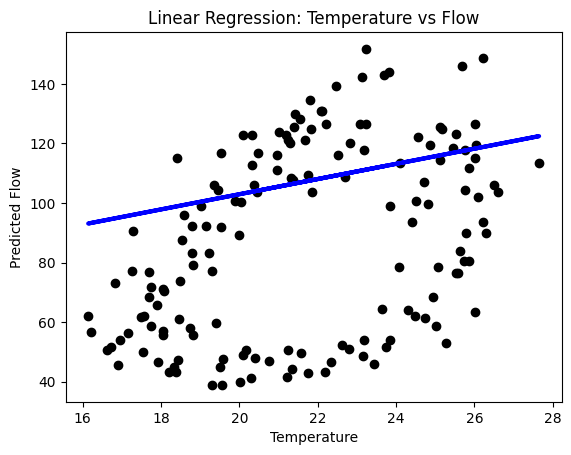

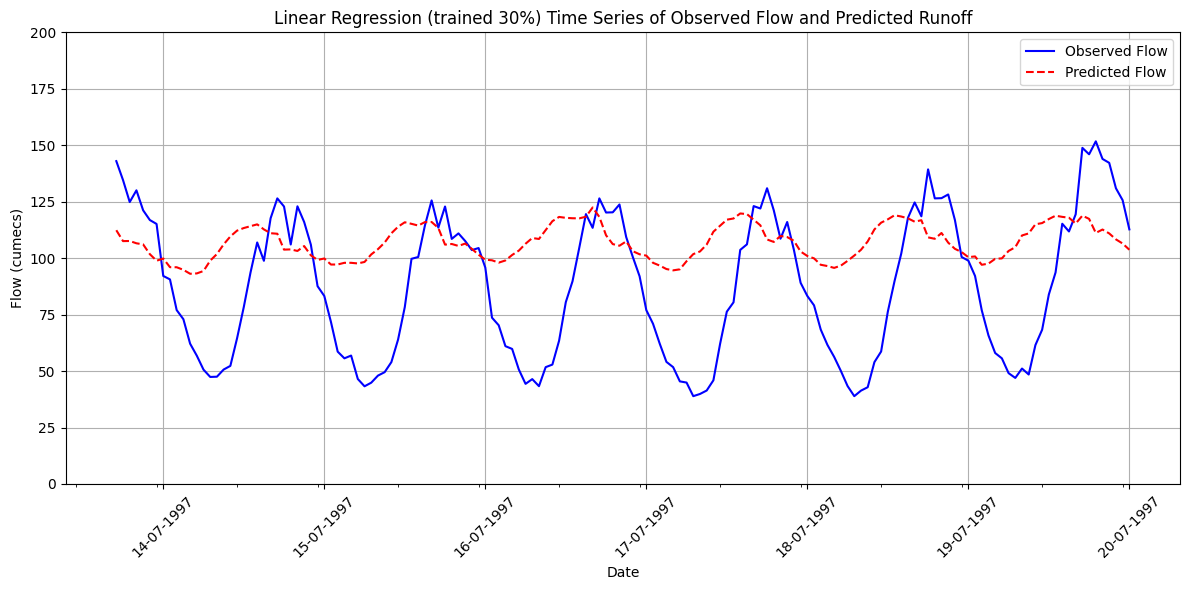

File saved successfully!


In [26]:
#linear regression model trained using training data (temperature is predictor and flow is the target)
#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
import matplotlib.dates as mdates # for plotting dates on graphs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the temperature and observed flow data in CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/passu_temp_Q_data_1997.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'

# Read climate data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')

# Shuffle the data not needed with time-series
#df = df.sample(frac=1, random_state=0)

# SPLIT DATA INTO TRAINING AND TEST SETS AND PREPARE DATA SETS

# Split the data into training and testing sets (10% training, 90% testing).
split_index = int(0.3 * len(df)) # % of the data for training

# The df[:split_index] is called DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df
train_data = df[:split_index] # Training data contains the first % of the data
test_data = df[split_index:] # Testing data contains the remaining 0% of the data

#print(train_data.columns)

# Prepare the training and testing data. This reads columns 2 (Temp) and 3 (Observed Flow) from CSV file
temp_X_train = train_data[['Temperature']].values
flow_y_train = train_data['Observed Flow'].values
temp_X_test = test_data[['Temperature']].values
flow_y_test = test_data['Observed Flow'].values
date_test = test_data ['Date']

# PERFORM LINEAR REGRESSION ON TRAINING DATA SET

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(temp_X_train, flow_y_train)

# MAKE PREDICTION OF FLOW ON TESTING DATA SET USING THE REGRESSION MODEL

# Make predictions using the testing set
flow_y_pred = regr.predict(temp_X_test)

#print (flow_y_pred)

# EVALUATE THE LINEAR REGRESSION MODEL PERFORMANCE

# Calculate the R-squared score
score = r2_score(flow_y_test, flow_y_pred)
print('R-squared score:', score)

# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
r2 = r2_score(flow_y_test, flow_y_pred)
mse = mean_squared_error(flow_y_test, flow_y_pred)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_y_test
predicted_values = flow_y_pred

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)


# CREATE SCATTER PLOT OF TEMPERATURE AND PREDICTED FLOW FOR TEST DATA

# Plot outputs
plt.scatter(temp_X_test, flow_y_test, color="black")
plt.plot(temp_X_test, flow_y_pred, color="blue", linewidth=3)

plt.xlabel('Temperature')
plt.ylabel('Predicted Flow')
plt.title('Linear Regression: Temperature vs Flow')

plt.show()

# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW


# Plot time series of observed flow and predicted flow
plt.figure(figsize=(12, 6))
plt.plot(date_test, flow_y_test, label='Observed Flow', color='blue')
plt.plot(date_test, flow_y_pred, label='Predicted Flow', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Flow (cumecs)')
plt.title('Linear Regression (trained 30%) Time Series of Observed Flow and Predicted Runoff')
plt.legend()

#Set range for y-axis
plt.ylim(0, 200)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot GRID
plt.grid(True)
plt.tight_layout()

plt.show()

# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

# Convert multi-dimensional arrays to one-dimensional arrays if necessary
temp_X_test = temp_X_test.ravel()  # Ensure temp_X_test is one-dimensional
flow_y_pred = flow_y_pred.ravel()  # Ensure flow_y_pred is one-dimensional

# Create DataFrame with one-dimensional arrays
results_df = pd.DataFrame({'Date': date_test,'Temperature': temp_X_test, 'Observed Flow': flow_y_test, 'Predicted Flow': flow_y_pred})

# Write the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_pred_LR_ML_flow.csv', index=False)

print("File saved successfully!")


DO NOT USE RANDOM FOREST

In general, Random Forest Regressor is not commonly used for time series forecasting due to its inherent nature of randomness and lack of sequential dependency consideration. Time series data usually exhibits temporal dependencies, and models like Autoregressive Integrated Moving Average (ARIMA), Seasonal Autoregressive Integrated Moving-Average (SARIMA), or Long Short-Term Memory (LSTM) networks are more suitable.

**Autoregressive Integrated Moving Average (ARIMA)**

This code sets up an ARIMA model with a first-order autoregressive term, first-order differencing, and a moving average term, and then makes predictions on the testing data

ARIMA stands for AutoRegressive Integrated Moving Average. It's a type of time series forecasting model that is used to predict future values based on past observations.

An ARIMA model combines autoregression (AR), differencing (I), and moving average (MA) components to model the underlying patterns and trends in a time series data and make predictions about future values. It's a powerful and widely used technique in time series analysis and forecasting.

Here's a simple breakdown of what each part of the name means:

**AutoRegressive (AR):** This part of the model captures the relationship between an observation and a number of lagged observations (i.e., observations at previous time steps). It assumes that the value of a variable at a particular time point can be predicted based on its past values.

**Integrated (I):** This part of the model is concerned with differencing the raw observations (i.e., subtracting each observation from its previous observation) in order to make the time series stationary. Stationarity is an important concept in time series analysis because it ensures that the statistical properties of the time series (such as its mean and variance) remain constant over time.

**Moving Average (MA):** This part of the model captures the relationship between an observation and a residual error from a moving average model applied to lagged observations. It represents the error of the model as a combination of the errors observed at previous time points.

An ARIMA model combines autoregression (AR), differencing (I), and moving average (MA) components to model the underlying patterns and trends in a time series data and make predictions about future values. It's a powerful and widely used technique in time series analysis and forecasting.

In the context of ARIMA (AutoRegressive Integrated Moving Average) models, the \( p \), \( d \), and \( q \) parameters represent the key components of the model:

1. **\( p \)**: The autoregressive (AR) parameter \( p \) represents the number of lag observations included in the model. It captures the relationship between the variable of interest and its own lagged values. In simpler terms, it indicates how many past observations are used to predict the current value.

2. **\( d \)**: The differencing parameter \( d \) represents the degree of differencing applied to the time series data to make it stationary. Stationarity implies that the statistical properties of the time series, such as mean and variance, remain constant over time. Differencing involves subtracting the previous observation from the current observation to eliminate trends or seasonality.

3. **\( q \)**: The moving average (MA) parameter \( q \) represents the number of lagged forecast errors included in the model. It captures the relationship between the variable of interest and the residual errors from a moving average model applied to lagged observations.

In summary:
- \( p \): Number of lag observations included in the model (autoregression).
- \( d \): Degree of differencing applied to make the time series stationary.
- \( q \): Number of lagged forecast errors included in the model (moving average).

These parameters are typically selected based on prior knowledge of the data, visual inspection of the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots, and statistical techniques such as grid search or information criteria (e.g., AIC, BIC) to find the best-fitting model.

**ARIMA model working (Final)**

This code demonstrates the process of fitting an ARIMA model to time series data, evaluating its performance, visualizing the results, and saving the predictions for further analysis.

The provided code conducts the following tasks:

1. **Data Preparation:**
   - Loads necessary libraries such as pandas, numpy, and matplotlib.
   - Mounts Google Drive to access the dataset.
   - Reads the temperature and observed flow data from a CSV file into a DataFrame.
   - Converts the 'Date' column to a datetime object.
   - Splits the data into training and testing sets, with 50% of the data for training.

2. **Model Training:**
   - Fits an ARIMA (AutoRegressive Integrated Moving Average) model to the training data.
   - Searches for the best combination of parameters \( p \), \( d \), and \( q \) using grid search and the AIC criterion.
   - Fits the ARIMA model with the best parameters to the training data.

3. **Model Evaluation:**
   - Makes predictions on the testing data using the trained ARIMA model.
   - Evaluates the model performance using the R-squared score.
   - Fits an Ordinary Least Squares (OLS) regression model to the training data and prints the summary of the regression results.

4. **Visualization:**
   - Creates a scatter plot of temperature vs. predicted flow for the test period.
   - Creates a time series plot of observed flow and predicted flow for the test period.

5. **Saving Results:**
   - Writes the model predictions along with the observed data to a CSV file on Google Drive.

Overall, the code demonstrates the process of fitting an ARIMA model to time series data, evaluating its performance, visualizing the results, and saving the predictions for further analysis.

Andrew Lowe
ID 1223456
Mounted at /content/drive/
Best AIC: 922.7492997883298
Best Order (p, d, q): (2, 1, 3)
R-squared score: 0.09138513876675647
Evaluation Metrics for Total Predicted Flow:
R2: 0.09
MSE: 1266.72
Nash-Sutcliffe Efficiency (NSE): 0.09138513876675647
Percent Bias (PBIAS): -25.515722002456947


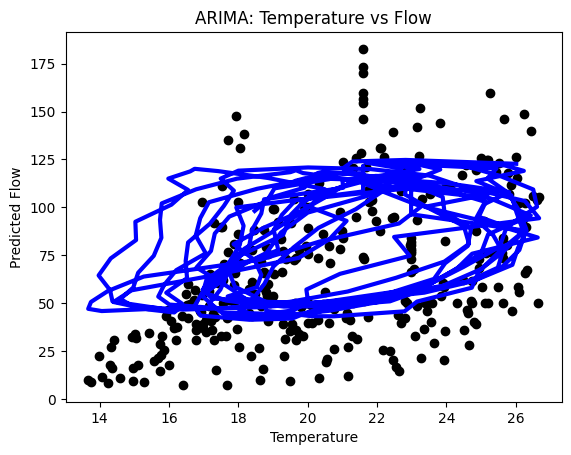

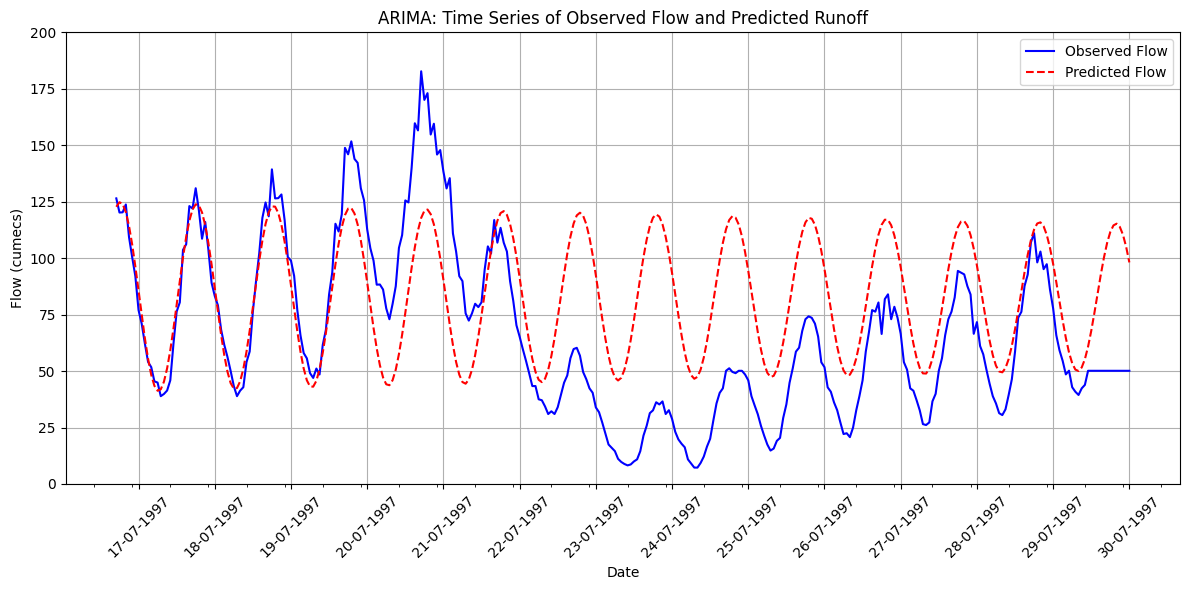

File saved successfully!


In [14]:
#ARIMA model to fit a timeseries of temperature to flow
#Change % split of training, and p.d.q values
#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
import matplotlib.dates as mdates # for plotting dates on graphs
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

import itertools
import warnings
warnings.filterwarnings("ignore")

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the temperature and observed flow data in CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/passu_temp_Q_data_1997.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997_full.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'

# Read climate data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')


# SPLIT DATA INTO TRAINING AND TEST SETS AND PREPARE DATA SETS

# Split the data into training and testing sets (30% training, 70% testing then 50%).
#split_index = int(0.5 * len(df)) # % of the data for training
split_index = int(0.3 * len(df)) # % of the data for training

# The df[:split_index] is called DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df
train_data = df[:split_index] # Training data contains the first % of the data
test_data = df[split_index:] # Testing data contains the remaining 0% of the data

#print(train_data.columns)

# Prepare the training and testing data. This reads columns 2 (Temp) and 3 (Observed Flow) from CSV file
temp_X_train = train_data[['Temperature']].values
flow_y_train = train_data['Observed Flow'].values
temp_X_test = test_data[['Temperature']].values
flow_y_test = test_data['Observed Flow'].values
date_test = test_data ['Date']


# MAKE PREDICTION OF FLOW USING ARIMA ON TESTING DATA

# Fit ARIMA model to training data using predefined p, d, q parameters
#order = (2, 1, 3)  # Define order of ARIMA model
#model = ARIMA(flow_y_train, order=order)
#arima_results = model.fit()

# Make predictions on testing data
#flow_y_pred = arima_results.forecast(steps=len(temp_X_test))

# DEFINE p, d, q PARAMETER VALUES AND MAKE PREDICTION OF FLOW USING ARIMA ON TESTING DATA

# Define range of values for p, d, q
p_values = range(0, 5)  # Autoregression order
d_values = range(0, 3)  # Differencing order
q_values = range(0, 5)  # Moving average order

best_aic = float("inf") # Initialize best AIC
best_order = None

# Iterate over all combinations of p, d, q values
for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # Fit ARIMA model
        model = ARIMA(flow_y_train, order=order)
        arima_results = model.fit()

#       # Calculate AIC
        aic = arima_results.aic
#
        # Update best AIC and order if current model has lower AIC
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

# Fit ARIMA model with best order
best_model = ARIMA(flow_y_train, order=best_order)
best_arima_results = best_model.fit()


# Make predictions using ARIMA on testing data
flow_y_pred = best_arima_results.forecast(steps=len(temp_X_test))


# EVALUATE MODEL PERFORMACE

# EVALUATE THE ARIMA MODEL PERFORMANCE

# Calculate the R-squared score
score = r2_score(flow_y_test, flow_y_pred)
print('R-squared score:', score)

# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
r2 = r2_score(flow_y_test, flow_y_pred)
mse = mean_squared_error(flow_y_test, flow_y_pred)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_y_test
predicted_values = flow_y_pred

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)


# CREATE SCATTER PLOT OF TEMPERATURE AND PREDICTED FLOW FOR TEST DATA

# Plot outputs
plt.scatter(temp_X_test, flow_y_test, color="black")
plt.plot(temp_X_test, flow_y_pred, color="blue", linewidth=3)

plt.xlabel('Temperature')
plt.ylabel('Predicted Flow')
plt.title('ARIMA: Temperature vs Flow')

plt.show()


# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW FOR TEST PERIOD

# Plot time series of observed flow and predicted flow
plt.figure(figsize=(12, 6))
plt.plot(date_test, flow_y_test, label='Observed Flow', color='blue')
plt.plot(date_test, flow_y_pred, label='Predicted Flow', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Flow (cumecs)')
plt.title('ARIMA: Time Series of Observed Flow and Predicted Runoff')
plt.legend()

#Set range for y-axis
plt.ylim(0, 200)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot GRID
plt.grid(True)
plt.tight_layout()

plt.show()


# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

# Convert multi-dimensional arrays to one-dimensional arrays if necessary
temp_X_test = temp_X_test.ravel()  # Ensure temp_X_test is one-dimensional
flow_y_pred = flow_y_pred.ravel()  # Ensure flow_y_pred is one-dimensional

# Create DataFrame with one-dimensional arrays
results_df = pd.DataFrame({'Date': date_test,'Temperature': temp_X_test, 'Observed Flow': flow_y_test, 'Predicted Flow': flow_y_pred})

# Write the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_pred_ARIMA_ML_flow.csv', index=False)

print("File saved successfully!")


**ARIMA model to fit time series of temperature, snowline and flow (add second predictor variable)**

Andrew Lowe
ID 1223456
Mounted at /content/drive/
Evaluation Metrics for Total Predicted Flow:
R2: 0.09
MSE: 1266.72
Nash-Sutcliffe Efficiency (NSE): 0.09138513876675647
Percent Bias (PBIAS): -25.515722002456947


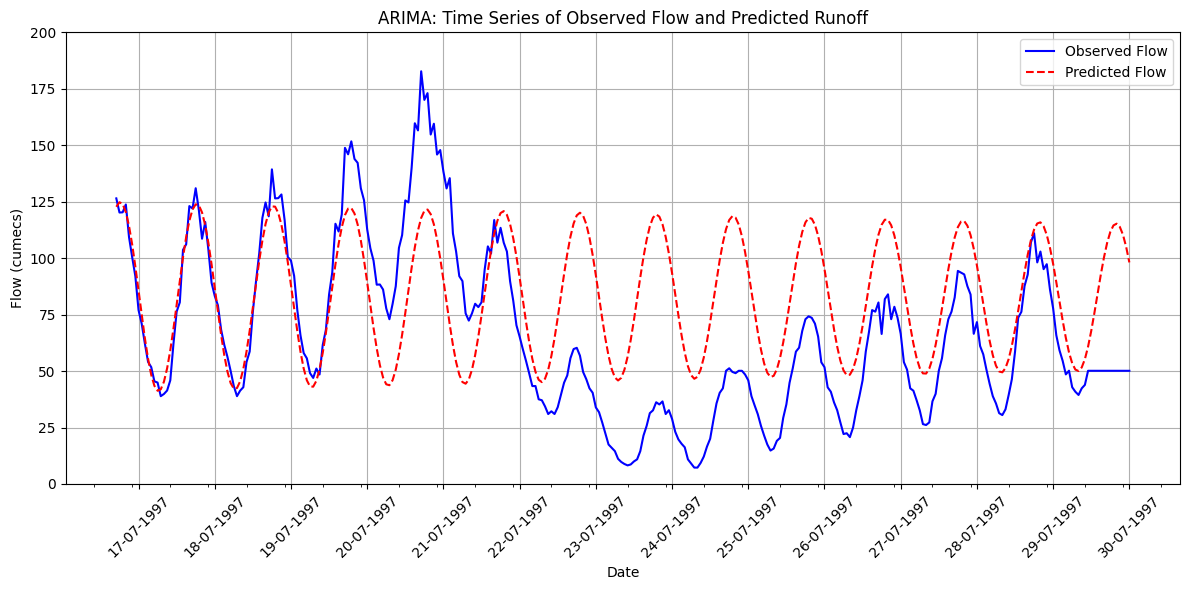

File saved successfully!


In [22]:
#ARIMA model to fit a timeseries of temperature and snowline to flow
# Note stats and plot no change from 1 variable as pdq do not work
#Change % split of training, and p.d.q values
#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
import matplotlib.dates as mdates # for plotting dates on graphs
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

import itertools
import warnings
warnings.filterwarnings("ignore")

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the temperature and observed flow data in CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/passu_temp_Q_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997_full.csv'

# Read climate data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')


# SPLIT DATA INTO TRAINING AND TEST SETS AND PREPARE DATA SETS

# Split the data into training and testing sets (30% training, 70% testing then 50%).
#split_index = int(0.5 * len(df)) # % of the data for training
split_index = int(0.3 * len(df)) # % of the data for training

# The df[:split_index] is called DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df
train_data = df[:split_index] # Training data contains the first % of the data
test_data = df[split_index:] # Testing data contains the remaining 0% of the data

#print(train_data.columns)

# Prepare the training and testing data. This reads columns Temperature, Snowline Elevation and Observed Flow from CSV file
temp_snow_X_train = train_data[['Temperature', 'Snowline Elevation']].values
flow_y_train = train_data['Observed Flow'].values
temp_snow_X_test = test_data[['Temperature', 'Snowline Elevation']].values
flow_y_test = test_data['Observed Flow'].values
date_test = test_data ['Date']

#print (temp_snow_X_train)
#print (temp_snow_X_test)

# MAKE PREDICTION OF FLOW USING ARIMA ON TESTING DATA

# Fit ARIMA model to training data using predefined p, d, q parameters
#order = (2, 1, 3)  # Define order of ARIMA model
order = (2, 1, 3)  # Define order of ARIMA model
model = ARIMA(flow_y_train, order=order)
arima_results = model.fit()

# Make predictions on testing data
flow_y_pred = arima_results.forecast(steps=len(temp_snow_X_test), exog=temp_snow_X_test)

#print (flow_y_test)
#print (flow_y_pred)

# DEFINE p, d, q PARAMETER VALUES AND MAKE PREDICTION OF FLOW USING ARIMA ON TESTING DATA

# Define range of values for p, d, q
#p_values = range(0, 5)  # Autoregression order
#d_values = range(0, 3)  # Differencing order
#q_values = range(0, 5)  # Moving average order

#best_aic = float("inf") # Initialize best AIC
#best_order = None

# Iterate over all combinations of p, d, q values
#for p, d, q in itertools.product(p_values, d_values, q_values):
#    order = (p, d, q)
#    try:
        # Fit ARIMA model
#        model = ARIMA(flow_y_train, order=order)
#       arima_results = model.fit()

#       # Calculate AIC
#        aic = arima_results.aic
#
        # Update best AIC and order if current model has lower AIC
#        if aic < best_aic:
#            best_aic = aic
#            best_order = order
#    except:
#        continue

#print("Best AIC:", best_aic)
#print("Best Order (p, d, q):", best_order)

# Fit ARIMA model with best order
#best_model = ARIMA(flow_y_train, order=best_order)
#best_model = ARIMA(flow_y_train, order=best_order)
#best_arima_results = best_model.fit()


# Make predictions using ARIMA on testing data
#flow_y_pred = best_arima_results.forecast(steps=len(temp_snow_X_test), exog=temp_snow_X_test)

# EVALUATE MODEL PERFORMACE

# EVALUATE THE ARIMA MODEL PERFORMANCE

# Calculate the R-squared score
#score = r2_score(flow_y_test, flow_y_pred)
#print('R-squared score:', score)

# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
r2 = r2_score(flow_y_test, flow_y_pred)
mse = mean_squared_error(flow_y_test, flow_y_pred)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_y_test
predicted_values = flow_y_pred

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)


# CREATE SCATTER PLOT OF TEMPERATURE AND PREDICTED FLOW FOR TEST DATA

# Plot outputs
#plt.scatter(temp_snow_X_test, flow_y_test, color="black")
#plt.plot(temp_snow_X_test, flow_y_pred, color="blue", linewidth=3)

#plt.xlabel('Temperature / Snowline')
#plt.ylabel('Predicted Flow')
#plt.title('ARIMA: Temperature vs Flow')

#plt.show()


# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW FOR TEST PERIOD

# Plot time series of observed flow and predicted flow
plt.figure(figsize=(12, 6))
plt.plot(date_test, flow_y_test, label='Observed Flow', color='blue')
plt.plot(date_test, flow_y_pred, label='Predicted Flow', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Flow (cumecs)')
plt.title('ARIMA: Time Series of Observed Flow and Predicted Runoff')
plt.legend()

#Set range for y-axis
plt.ylim(0, 200)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot GRID
plt.grid(True)
plt.tight_layout()

plt.show()


# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

# Convert multi-dimensional arrays to one-dimensional arrays if necessary
temp_snow_X_test = temp_snow_X_test.ravel()  # Ensure temp_X_test is one-dimensional
flow_y_pred = flow_y_pred.ravel()  # Ensure flow_y_pred is one-dimensional

# Create DataFrame with one-dimensional arrays
results_df = pd.DataFrame({'Date': date_test,'Observed Flow': flow_y_test, 'Predicted Flow': flow_y_pred})

# Write the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_pred_ARIMA2_ML_flow.csv', index=False)

print("File saved successfully!")


**SARIMA model - seasonal trends of temperature and flow**

SARIMA stands for Seasonal Autoregressive Integrated Moving Average. It is an extension of the ARIMA (Autoregressive Integrated Moving Average) model that incorporates seasonality into the forecasting process. SARIMA models are particularly useful when dealing with time series data that exhibit seasonal patterns.

The SARIMA model consists of three main components:

1. Seasonal Autoregression (SAR): This component captures the relationship between the current observation and its seasonal lagged values. It is denoted by the parameter \(P\) and represents the number of seasonal autoregressive terms.

2. Seasonal Integration (I): This component represents the differencing of the time series data at the seasonal lag. It is denoted by the parameter \(D\) and indicates the number of times the data is differenced at the seasonal lag.

3. Seasonal Moving Average (SMA): This component models the dependency between the current observation and the previous forecast errors at seasonal lags. It is denoted by the parameter \(Q\) and represents the number of seasonal moving average terms.

In addition to these seasonal components, SARIMA models also include non-seasonal components similar to ARIMA models, such as autoregressive (AR) terms, differencing (I) terms, and moving average (MA) terms.

The general form of a SARIMA model is SARIMA(\(p, d, q\), \(P, D, Q\), \(m\)), where:

- \(p\), \(d\), \(q\) are the non-seasonal ARIMA parameters.
- \(P\), \(D\), \(Q\) are the seasonal SARIMA parameters.
- \(m\) is the seasonal period, which represents the number of time periods per season (e.g., 12 for monthly data, 4 for quarterly data, or 24 for hourly data).

By incorporating both seasonal and non-seasonal components, SARIMA models can effectively capture the complex patterns present in time series data and provide accurate forecasts.

Andrew Lowe
ID 1223456
Mounted at /content/drive/
Best AIC: 580.1386251150317
Best Order (p, d, q): (0, 1, 2)
Best Seasonal Order (P, D, Q, m): (0, 1, 1, 24)
R-squared score: -0.004305729679007664
Evaluation Metrics for Total Predicted Flow:
R2: -0.00
MSE: 1400.12
Nash-Sutcliffe Efficiency (NSE): -0.004305729679007664
Percent Bias (PBIAS): 37.277615221734976


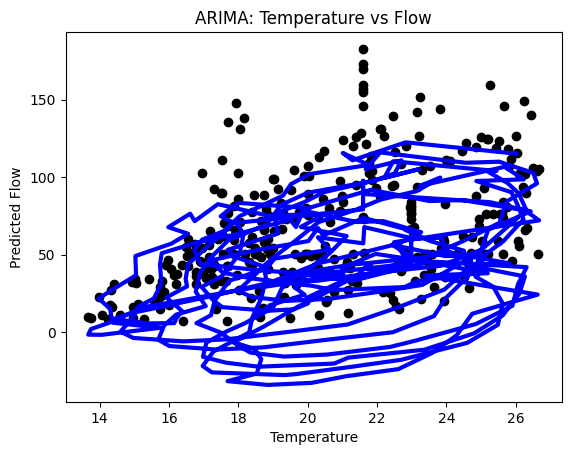

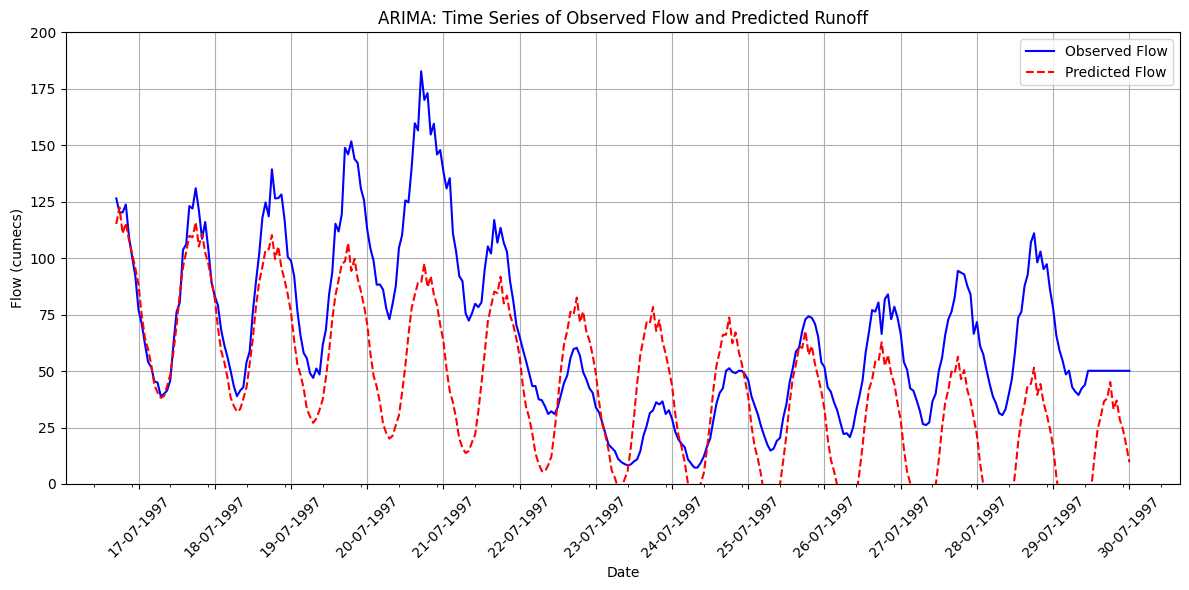

File saved successfully!


In [24]:
#ARIMA model to fit a timeseries of temperature to flow
#Change % split of training, and p.d.q values
#IMPORT LIBARIES
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for numerical operations
from google.colab import drive # used in Google Colab notebooks to mount Google Drive
import matplotlib.pyplot as plt # for plotting a graph.
import matplotlib.dates as mdates # for plotting dates on graphs
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error

import itertools
import warnings
warnings.filterwarnings("ignore")

# NAME AND STUDENT ID
print('Andrew Lowe')
print ('ID 1223456')

# LOAD DATA CSV FILES

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the temperature and observed flow data in CSV file from Google Drive
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997_full.csv'

# Read climate data from CSV file and create a DataFrame
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')


# SPLIT DATA INTO TRAINING AND TEST SETS AND PREPARE DATA SETS

# Split the data into training and testing sets (30% training, 70% testing then 50%).
split_index = int(0.3 * len(df)) # % of the data for training

# The df[:split_index] is called DataFrame slicing, where the train_data = df[:split_index] creates a new DataFrame called train_data containing the first split_index rows of the original DataFrame df
train_data = df[:split_index] # Training data contains the first % of the data
test_data = df[split_index:] # Testing data contains the remaining % of the data

#print(train_data.columns)

# Prepare the training and testing data. This reads columns 2 (Temp) and 3 (Observed Flow) from CSV file
temp_X_train = train_data[['Temperature']].values
flow_y_train = train_data['Observed Flow'].values
temp_X_test = test_data[['Temperature']].values
flow_y_test = test_data['Observed Flow'].values
date_test = test_data ['Date']

# DEFINE p, d, q, P, D, Q, and m PARAMETER VALUES AND MAKE PREDICTION OF FLOW USING SARIMA ON TESTING DATA

# Define range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregression order
d_values = range(0, 2)  # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregression order
D_values = range(0, 2)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order

m = 24  # Seasonal period (assuming 24 hours per day)

best_aic = float("inf")  # Initialize best AIC
best_order = None
best_seasonal_order = None

# Iterate over all combinations of p, d, q, P, D, Q values
for p, d, q, P, D, Q in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values):
    order = (p, d, q)
    seasonal_order = (P, D, Q, m)
    try:
        # Fit SARIMA model
        model = SARIMAX(flow_y_train, exog=temp_X_train, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        sarima_results = model.fit()

        # Calculate AIC
        aic = sarima_results.aic

        # Update best AIC, order, and seasonal_order if current model has lower AIC
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_seasonal_order = seasonal_order
    except:
        continue

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)
print("Best Seasonal Order (P, D, Q, m):", best_seasonal_order)

# Fit SARIMA model with best order and seasonal order
best_model = SARIMAX(flow_y_train, exog=temp_X_train, order=best_order, seasonal_order=best_seasonal_order,
                     enforce_stationarity=False, enforce_invertibility=False)
best_sarima_results = best_model.fit()

# Make predictions using SARIMA on testing data
flow_y_pred = best_sarima_results.forecast(steps=len(temp_X_test), exog=temp_X_test)

# EVALUATE MODEL PERFORMACE

# EVALUATE THE ARIMA MODEL PERFORMANCE

# Calculate the R-squared score
score = r2_score(flow_y_test, flow_y_pred)
print('R-squared score:', score)

# EVALUATE THE PERFORMANCE OF THE GLACIER RUNOFF MODEL

# Evaluate runoff model results (1) with simple r2 and mean standard error (mse)

# Calculate evaluation metrics for total predicted flow
r2 = r2_score(flow_y_test, flow_y_pred)
mse = mean_squared_error(flow_y_test, flow_y_pred)

# Print evaluation metrics for total predicted flow
print("Evaluation Metrics for Total Predicted Flow:")
print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

# Evaluate runof model results (2) using Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_y_test
predicted_values = flow_y_pred

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)


# CREATE SCATTER PLOT OF TEMPERATURE AND PREDICTED FLOW FOR TEST DATA

# Plot outputs
plt.scatter(temp_X_test, flow_y_test, color="black")
plt.plot(temp_X_test, flow_y_pred, color="blue", linewidth=3)

plt.xlabel('Temperature')
plt.ylabel('Predicted Flow')
plt.title('ARIMA: Temperature vs Flow')

plt.show()


# CREATE TIME SERIES PLOT OF OBSERVED FLOW and PREDICTED FLOW FOR TEST PERIOD

# Plot time series of observed flow and predicted flow
plt.figure(figsize=(12, 6))
plt.plot(date_test, flow_y_test, label='Observed Flow', color='blue')
plt.plot(date_test, flow_y_pred, label='Predicted Flow', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Flow (cumecs)')
plt.title('ARIMA: Time Series of Observed Flow and Predicted Runoff')
plt.legend()

#Set range for y-axis
plt.ylim(0, 200)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot GRID
plt.grid(True)
plt.tight_layout()

plt.show()


# WRITE MODEL RESULTS TO CSV FILE

# Write the predictions to a file on Google Drive and confirm file is saved

# Convert multi-dimensional arrays to one-dimensional arrays if necessary
temp_X_test = temp_X_test.ravel()  # Ensure temp_X_test is one-dimensional
flow_y_pred = flow_y_pred.ravel()  # Ensure flow_y_pred is one-dimensional

# Create DataFrame with one-dimensional arrays
results_df = pd.DataFrame({'Date': date_test,'Temperature': temp_X_test, 'Observed Flow': flow_y_test, 'Predicted Flow': flow_y_pred})

# Write the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_pred_ARIMA_ML_flow.csv', index=False)

print("File saved successfully!")

**Long Short-Term Memory (LSTM) for predicting flow**

---



The code aims to build, train, and evaluate an LSTM model for predicting observed flow based on temperature data, and visualize the model's performance.

Overall, the code aims to build, train, and evaluate an LSTM model for predicting observed flow based on temperature data, and visualize the model's performance.

The provided code implements a Long Short-Term Memory (LSTM) model for predicting observed flow based on temperature data. Here's a summary of the code:

1. **Import Libraries**: The code imports necessary libraries including pandas, numpy, matplotlib, and scikit-learn for data manipulation, numerical operations, plotting, and LSTM model implementation.

2. **Mount Google Drive**: It mounts Google Drive to access data files stored on Google Drive.

3. **Load Data**: The code reads a CSV file containing temperature and observed flow data into a pandas DataFrame.

4. **Split Data**: It splits the data into training and testing sets, with 50% of the data used for training and 50% for testing.

5. **Prepare Data**: The temperature and observed flow data are extracted from the DataFrame and prepared for training and testing.

6. **Define LSTM Model**: An LSTM model is defined using the Keras library, specifying the number of units, input shape, and activation function.

7. **Compile Model**: The model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function.

8. **Train Model**: The LSTM model is trained on the training data using the `fit()` function.

9. **Make Predictions**: Predictions of flow are made on the testing data using the trained LSTM model.

10. **Evaluate Model Performance**: The R-squared score and Mean Squared Error (MSE) are calculated to evaluate the performance of the LSTM model on the testing data.

11. **Plot Predictions**: The observed flow and predicted flow are plotted over time to visualize the model's performance.

12. **Save Results**: The model predictions along with the observed flow and temperature data are saved to a CSV file on Google Drive.



An LSTM model for predicting river flow based on temperature is like a smart memory cell that learns and remembers important temperature-flow relationships over time, uses that knowledge to make accurate predictions, and adapts to changing temperature patterns to provide reliable forecasts of river flow.

 The Long Short-Term Memory (LSTM) model using the example of predicting river flow based on temperature is as follows:

1. **Memory Cells**: Imagine you have a special river flow prediction cell called an LSTM cell. This cell can remember important temperature patterns and their relation to river flow over time.

2. **Remembering Important Temperature-Flow Relationships**: When the LSTM cell observes how temperature affects river flow, it decides what temperature patterns are important to remember. For example, it may notice that higher temperatures tend to lead to increased river flow after a certain delay.

3. **Input, Output, and Forget Gates**: The LSTM cell has three gates: an input gate, an output gate, and a forget gate. These gates control how much attention the cell pays to new temperature data, how it uses its existing memory, and what it chooses to forget.

4. **Input Gate**: When new temperature data comes in, the input gate decides which parts of the temperature data are relevant for predicting river flow and adds them to the cell's memory.

5. **Forget Gate**: Sometimes, old temperature patterns may no longer be relevant for predicting river flow, so the forget gate helps the LSTM cell decide what temperature-flow relationships to forget from its memory.

6. **Output Gate**: When it's time to predict the river flow based on current temperature, the output gate decides which temperature-flow relationships stored in the memory to use and passes that information to make an accurate prediction.

7. **Sequencing Temperature Data**: LSTM cells excel at understanding how temperature patterns change over time and how they relate to river flow. They can effectively capture complex temperature-flow relationships that evolve over time, making them suitable for modeling time series data like river flow prediction.

The code provided performs the following tasks:

1. **Data Loading and Preprocessing**:
   - Imports necessary libraries including pandas, numpy, and TensorFlow.
   - Mounts Google Drive to access the dataset file.
   - Loads the dataset containing temperature and observed flow data for the year 1997.
   - Converts the 'Date' column to datetime format.

2. **Data Splitting and Preparation**:
   - Splits the dataset into training and testing sets (70% training, 30% testing).
   - Extracts temperature and observed flow data from the training and testing sets.
   - Normalizes the temperature data using MinMaxScaler.

3. **Model Building**:
   - Builds an LSTM (Long Short-Term Memory) neural network model using TensorFlow's Sequential API.
   - Configures the model with one LSTM layer consisting of 50 units followed by a Dense output layer.
   - Compiles the model with the Adam optimizer and mean squared error loss function.

4. **Model Training**:
   - Trains the LSTM model using the training data with 100 epochs and a batch size of 32.

5. **Model Evaluation**:
   - Makes predictions on the testing data using the trained LSTM model.
   - Inverts the scaling transformation to obtain the predicted flow values in the original scale.
   - Evaluates the model performance using R-squared score and Mean Squared Error (MSE).

6. **Additional Evaluation Metrics**:
   - Calculates Nash-Sutcliffe Efficiency (NSE) and Percent Bias (PBIAS) to further evaluate the model performance.

7. **Visualization**:
   - Plots the scatter plot of temperature vs. observed flow and the predicted flow curve.
   - Plots the time series of observed flow and predicted flow over the test period.

8. **Saving Model Results**:
   - Saves the model results including the observed flow, predicted flow, temperature, and date to a CSV file.

9. **Output Confirmation**:
   - Prints a message indicating the successful saving of the model results to a CSV file.

To fix the error in the code, ensure that all necessary libraries are imported correctly and that the paths to the dataset file are accurate. Additionally, check for any typos or syntax errors in the code.

To improve the performance of the LSTM model and better fit the data, you can experiment with adjusting several parameters. Here are some parameters you can consider changing:

1. **Number of LSTM units**: The number of LSTM units determines the complexity and capacity of the model to capture patterns in the data. Increasing the number of units may allow the model to learn more complex patterns, but it also increases the computational cost.

2. **Number of epochs**: The number of epochs defines how many times the model will iterate over the entire training dataset. Increasing the number of epochs may allow the model to better learn the patterns in the data, but too many epochs can lead to overfitting.

3. **Batch size**: The batch size determines the number of samples used in each training iteration. A smaller batch size may provide a noisier estimate of the gradient but can help the model generalize better. Conversely, a larger batch size may provide a more stable estimate of the gradient but may lead to slower convergence.

4. **Optimizer and learning rate**: Experiment with different optimizers (e.g., Adam, RMSprop, SGD) and learning rates to find the optimal combination for training the model. The learning rate controls the step size during optimization and can significantly impact the convergence of the model.

5. **Loss function**: The choice of loss function can affect the training process and the performance of the model. While Mean Squared Error (MSE) is commonly used for regression tasks, you can also consider other loss functions such as Mean Absolute Error (MAE) or Huber loss.

6. **Regularization**: Apply regularization techniques such as dropout or L2 regularization to prevent overfitting and improve the generalization of the model.

7. **Architecture**: Experiment with different architectures, such as adding more LSTM layers or incorporating additional Dense layers, to see if they improve the model's performance.

8. **Data preprocessing**: Explore different ways of preprocessing the input data, such as using different scaling techniques or incorporating additional features that may help improve the model's ability to learn the underlying patterns in the data.

By carefully tuning these parameters and experimenting with different configurations, you can optimize the LSTM model to better fit the observed flow data and improve its overall performance.

Mounted at /content/drive/
Epoch 1/75
5/5 [==============================] - 2s 4ms/step - loss: 9356.7627
Epoch 2/75
5/5 [==============================] - 0s 3ms/step - loss: 9353.3115
Epoch 3/75
5/5 [==============================] - 0s 3ms/step - loss: 9349.8848
Epoch 4/75
5/5 [==============================] - 0s 3ms/step - loss: 9346.4023
Epoch 5/75
5/5 [==============================] - 0s 4ms/step - loss: 9342.8379
Epoch 6/75
5/5 [==============================] - 0s 4ms/step - loss: 9339.2139
Epoch 7/75
5/5 [==============================] - 0s 3ms/step - loss: 9335.4590
Epoch 8/75
5/5 [==============================] - 0s 4ms/step - loss: 9331.6426
Epoch 9/75
5/5 [==============================] - 0s 3ms/step - loss: 9327.6201
Epoch 10/75
5/5 [==============================] - 0s 4ms/step - loss: 9323.5000
Epoch 11/75
5/5 [==============================] - 0s 4ms/step - loss: 9319.2607
Epoch 12/75
5/5 [==============================] - 0s 4ms/step - loss: 9314.8184
Epoch 13/7

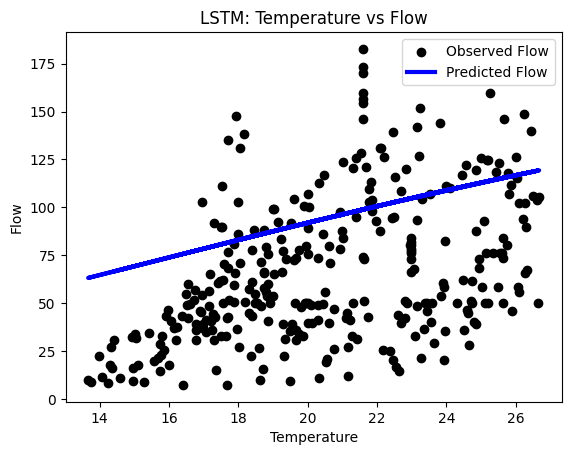

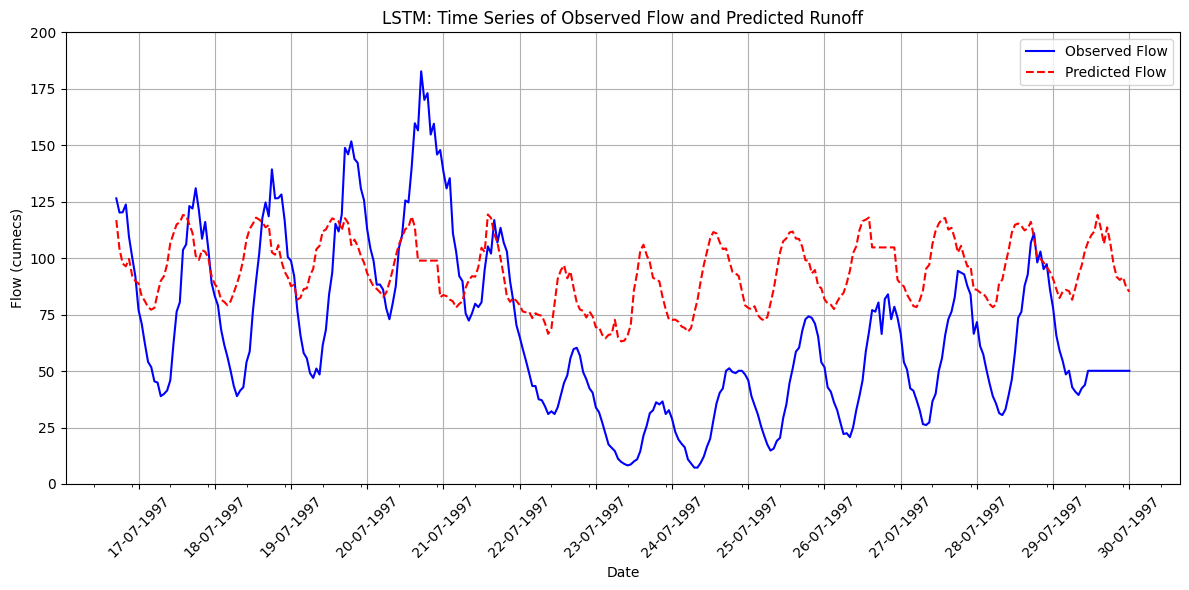

File saved successfully!


In [37]:
#LSTM Model for predicting river flow based on temperature
#Change % split, number of LSTM units, number of epochs, and batch size
#IMPORT LIBARIES
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Load the data
#file_path = '/content/drive/MyDrive/dataset/passu_temp_Q_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997.csv'
#file_path = '/content/drive/MyDrive/dataset/passu_data_1997_all.csv'
file_path = '/content/drive/MyDrive/dataset/passu_data_1997_full.csv'

df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')

# Split the data into training and testing sets
split_index = int(0.3 * len(df))
train_data = df[:split_index]
test_data = df[split_index:]

# Prepare the training and testing data
temp_X_train = train_data[['Temperature']].values
flow_y_train = train_data['Observed Flow'].values
temp_X_test = test_data[['Temperature']].values
flow_y_test = test_data['Observed Flow'].values
date_test = test_data['Date'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
temp_X_train_scaled = scaler.fit_transform(temp_X_train)
temp_X_test_scaled = scaler.transform(temp_X_test)

# Reshape data for LSTM
temp_X_train_reshaped = temp_X_train_scaled.reshape((-1, 1, 1))
temp_X_test_reshaped = temp_X_test_scaled.reshape((-1, 1, 1))

# Build the LSTM model
model = Sequential()
#model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(LSTM(units=25, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(temp_X_train_reshaped, flow_y_train, epochs=100, batch_size=32)
model.fit(temp_X_train_reshaped, flow_y_train, epochs=75, batch_size=32)

# Make predictions
flow_y_pred_scaled = model.predict(temp_X_test_reshaped)
flow_y_pred = scaler.inverse_transform(flow_y_pred_scaled)

# Evaluate the model
score = r2_score(flow_y_test, flow_y_pred)
mse = mean_squared_error(flow_y_test, flow_y_pred)
print('R-squared score:', score)
print('Mean Squared Error:', mse)

# Prepare to calculate Nash-Sutcliffe Efficiency (NSE)and PBIAS

# Observed and predicted values
observed_values = flow_y_test
predicted_values = flow_y_pred

# Calculate mean of observed values
observed_mean = np.mean(observed_values)

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - observed_mean) ** 2))

# Calculate Percent Bias (PBIAS)
pbias = (np.sum(observed_values - predicted_values) / np.sum(observed_values)) * 100

print("Nash-Sutcliffe Efficiency (NSE):", nse)
print("Percent Bias (PBIAS):", pbias)

# Plot outputs
plt.scatter(temp_X_test, flow_y_test, color='black', label='Observed Flow')
plt.plot(temp_X_test, flow_y_pred, color='blue', linewidth=3, label='Predicted Flow')
plt.xlabel('Temperature')
plt.ylabel('Flow')
plt.title('LSTM: Temperature vs Flow')
plt.legend()
plt.show()

# Plot time series of observed flow and predicted flow
plt.figure(figsize=(12, 6))
plt.plot(date_test, flow_y_test, label='Observed Flow', color='blue')
plt.plot(date_test, flow_y_pred, label='Predicted Flow', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Flow (cumecs)')
plt.title('LSTM: Time Series of Observed Flow and Predicted Runoff')
plt.legend()

#Set range for y-axis
plt.ylim(0, 200)

# Set x-axis major and minor intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major interval: 1 day
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Minor interval: 6 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format the major ticks as 'DD-MM-YYYY'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot GRID
plt.grid(True)
plt.tight_layout()

plt.show()

# Write model results to CSV file
results_df = pd.DataFrame({'Date': test_data['Date'], 'Temperature': temp_X_test.ravel(),
                           'Observed Flow': flow_y_test, 'Predicted Flow': flow_y_pred.ravel()})
results_df.to_csv('/content/drive/MyDrive/dataset/output/passu_pred_LSTM_flow.csv', index=False)
print("File saved successfully!")
